**Case Study - Impact of Fake online reviews on brand attitude & consumer behavior**    
   
Correlation | ANCOVA | Effect size | Post-hoc test | Regression | Mediation | Moderation | Path Analysis | Cluster Analysis


The Case study was based on a [Master thesis](master_thesis.pdf) focused on the Impact of fake online review on brand attitude and consumer behavior. 
The paper discussed basic concepts of the issue, the influence of fake reviews on brand attitude & consumer behavior as well as the theoretical framework of the research.

For empirical research, the author have done:
- Basic descriptive analyis
- AN(C)OVA.

There are still more rooms for improvement in the Analysis.

In this work, we will only focus on & improve the Data Analysis part by introduce many Data analysis methods along with my own approaches in each details. The relationship between different variables will be analyzed with different approaches to find out how they relate, impact each other with a final goal to determine how Fake online reviews affect customers in their brand attitude & consuming behavior.

Statistical testing methods used in the Case study:
- Correlation
- ANOVA/ANCOVA
- Effect size calculation
- Post-hoc test
- Regression
- Mediation/Moderation
- Path analysis
- Cluster analysis

<a id="1"></a>
# <span style="color:#004481"> I. Introduction </span> 

The [dataset](raw_data_master_thesis.xlsx) consists of survey results from 100 participants in Austria. All of the audience were asked to imagine themselves in the situation of browsing through the internet looking for headphones to purchase. After that, the participants were equally and randomly assigned to either fake or real reviews on the product, precisely headphones from the Samsung brand. In addition to the reviews, subjects also encountered press release that assisted them in acknowledging whether the reviews were fake or real. After that, participants were asked to evaluate the suggested statements.

For evaluation questions, a likert scale of a seven-point response format was used to describe participants' opinions (1 = Strongly disagree, 7 = Strongly agree **or** 1 = Very low, 7 = Very high (Q25)).

<a id="1.1"></a>
## 1.1. Let's take a look at the dataset

In [87]:
library(tidyverse)
library(readxl)

In [88]:
data <- read_xlsx("raw_data_master_thesis.xlsx")

head(data)

New names:
• `Q40` -> `Q40...47`
• `Q40` -> `Q40...50`


Progress,Duration (in seconds),Finished,RecordedDate,DistributionChannel,UserLanguage,Brand attitude pre,Q29,Q30,Q31,⋯,Q27_1,Q27_2,Q27_3,Q27_4,Q38,Q40...47,Q1,Q2,Q40...50,FL_13_DO
<dbl>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
100,209,1,2022-05-17,anonymous,EN,5,5,5,5,⋯,7,7,7,7,Samsung,Austria,23,2,1,Fake
100,579,1,2022-05-17,anonymous,EN,5,5,5,5,⋯,7,7,7,7,Samsung,Austria,20,1,1,Fake
100,192,1,2022-05-17,anonymous,EN,5,6,5,6,⋯,7,7,7,7,Samsung,Austria,24,2,1,Real
100,753,1,2022-05-17,anonymous,EN,5,5,5,5,⋯,7,7,7,7,Samsung,Austria,28,1,4,Real
100,634,1,2022-05-17,anonymous,EN,4,3,4,1,⋯,3,4,4,6,Samsung,Austria,23,2,4,Fake
100,490,1,2022-05-17,anonymous,EN,5,4,5,4,⋯,6,5,4,6,Samsung,Austria,22,2,1,Real


<a id="1.2"></a>
## 1.2. Data dictionary

This section explains the variables in the dataset, which are the questions were asked.
There are 2 types of variables:
- The first group contains the variables as the background information/ data generated from the participants.
- The second group are the answers of the questions that the participants were asked in the survey.
   
   
### Information
- **Progress**: The completion of the survey form (by participants)
- **Duration (in seconds)**: How long does it take the participant to finish the survey
- **Finished**: 1-If the participant had finished the survey / 0-If the participant had not finished the survey
- **RecordedDate**: The date of the survey
- **Distribution channel**: The channel that the survey was distributed from
- **UserLanguage**: Language of the participant (that he/she chooses at the start of the survey)

   
   
### Questions:
**Background/Demographics**
- **Q38**: Which brand did you evaluate during this survey? Please name it:
- **Q40**: Please, state your country of origin
- **Q1**: Please, insert your age
- **Q2**: Please, select your gender
- **Q40**: What is your profession?

**Brand attitude pre exposure: (Please, evaluate your attitude towards Samsung BRAND):**

Q29
Q30
Q31

**Brand attitude post exposure:**

Q7
Q8
Q9
Q18

**Product attitude:**

Q33
Q34
Q35
Q36

**Quality perception:**
- Q37_1: The headphones appear to be a good quality
- Q37_2: The headphones appear to be durable
- Q37_3: The headphones apper to be reliable

**Trust:**

Q10
Q11
Q12
Q13
Q14

**Purchase Intent:**
- Q15_1: I would purchase this product
- Q15_2: I would consider buying this product
- Q25: The probability that I would consider buying this product is

**Market Commitment:**
- Q16_1: I would return to this e-marketplace’s Website
- Q16_2: I would consider purchasing from this e-marketplace in the next three months
- Q16_3: I would consider purchasing from this e-marketplace in the next year
- Q16_4: For this purchase I will buy from this e-marketplace

**Product interest:**
- Q5_1: I am particularly interested in the shown product
- Q5_2: Given my personal interests, this product is not very relevant to me
- Q5_3: Overall, I am quite involved when I am purchasing headphones for personal use

**Brand familiarity:**
- Q6: brand_familiarity
- Q17: brand_recognization
- Q23: brand_heard

**Internet usage:**
- Q27_1: I spend several hours a week on the Web
- Q27_2: Compared with most Austrians, I think I spend a lot of time on the Web
- Q27_3: Outside of the time I spend with e-mail, I consider myself to be a “heavy user” of the Web
- Q27_4: In a typical week, I visit dozens of sites



<a id="1.3"></a>
## 1.3. Variables definition:
To measure the impact of fake reviews on participants' attitude, trust, purchase intention and many other attributes, we define:
- *Fake online reviews* as **independent variable**.
- *Brand exposure, consumer trust, purchase intention, quality perception, product attitude, market commitment* as **dependent variables**.
- *Brand familiarity, internet usage and product interest* as **covariates**.
- *Age, gender, profession and language* as **categorical/demographic variables**.


<a id="1.4"></a>
## 1.4. Hypotheses
We will use 4 original hypotheses of the thesis:
- H1: Fake online reviews negatively impact consumers’ attitudes toward the brand
- H2: Fake online reviews have a negative effect on consumers’ trust in online platform and reviews
- H3: Fake online reviews negatively influence consumers’ purchase intention
- H4: Consumer trust in the online reviews increases purchase intention


<a id="1.5"></a>
## 1.5. R packages used in the analysis

In the above sections, we have already used *tidyverse* and *readxl*:
- *tidyverse*: 
    - **dplyr**: will be mainly used for common functions such as select(), filter(), mutate(), rename(), ... and the pipe operator "%>%"
    - **ggplot2**: for graphing plots, visualization
- *readxl*: to read the .xlsx dataset

Aside from them, we will use many other different packages to support our analysis process:
lsr, mediation, lavaan, semPlot, factoextra, car, gridExtra

In [89]:
install.packages("lsr")
install.packages("mediation")
install.packages("lavaan")
install.packages("semPlot")
install.packages("factoextra")
install.packages("nord") 
install.packages("scales")

Installing lsr [0.5.2] ...
	OK [linked cache]
Installing mediation [4.5.0] ...
	OK [linked cache]
Installing lavaan [0.6-17] ...
	OK [linked cache]
Installing semPlot [1.1.6] ...
	OK [linked cache]
Installing factoextra [1.0.7] ...
	OK [linked cache]
Installing nord [1.0.0] ...
	OK [linked cache]


In [90]:
# library(tidyverse) # data manipulation
library(scales) # Convert data into percentage
library(car) # regressions
library(lsr) # effect size calculation
library(mediation) # mediation analysis
library(lavaan) #  factor analysis
library(semPlot) # plot regression models
library(factoextra) # cluster analysis plotting
library(gridExtra) # Arrange ggplot2 graphs in specific orders
library(nord) # Color palette for ggplot2

<a id="2"></a>
# <span style="color:#004481"> II. Data cleaning </span>

<a id="2.1"></a>
## 2.1. Data merging
- Q24 and Q25 column in dataset all represent **the time it takes for the respondents to submit the survey**.
- While Q24 is the timing of respondents who take the Fake review version, Q25 is the timing of the respondents who take the Real review version.
- There are NAs in Q24 if it's the Real version and vice versa.   
- **Therefore, it's possible to merge these 2 columns together.**   

In [91]:
data[,c('Q24_Page Submit', 'Q25_Page Submit')]

Q24_Page Submit,Q25_Page Submit
<dbl>,<dbl>
78.554,NA
23.958,NA
NA,66.266
NA,11.808
34.287,NA
NA,47.603
78.431,NA
40.402,NA
NA,23.871


In [92]:
data <- data %>%
    unite(
        page_submit_time,
        'Q24_Page Submit', 'Q25_Page Submit',
        na.rm = TRUE
        )%>%
    mutate(
        page_submit_time = as.numeric(page_submit_time)
        )

In [93]:
data

Progress,Duration (in seconds),Finished,RecordedDate,DistributionChannel,UserLanguage,Brand attitude pre,Q29,Q30,Q31,⋯,Q27_1,Q27_2,Q27_3,Q27_4,Q38,Q40...47,Q1,Q2,Q40...50,FL_13_DO
<dbl>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
100,209,1,2022-05-17,anonymous,EN,5,5,5,5,⋯,7,7,7,7,Samsung,Austria,23,2,1,Fake
100,579,1,2022-05-17,anonymous,EN,5,5,5,5,⋯,7,7,7,7,Samsung,Austria,20,1,1,Fake
100,192,1,2022-05-17,anonymous,EN,5,6,5,6,⋯,7,7,7,7,Samsung,Austria,24,2,1,Real
100,753,1,2022-05-17,anonymous,EN,5,5,5,5,⋯,7,7,7,7,Samsung,Austria,28,1,4,Real
100,634,1,2022-05-17,anonymous,EN,4,3,4,1,⋯,3,4,4,6,Samsung,Austria,23,2,4,Fake
100,490,1,2022-05-17,anonymous,EN,5,4,5,4,⋯,6,5,4,6,Samsung,Austria,22,2,1,Real
100,485,1,2022-05-17,anonymous,EN,5,5,6,3,⋯,7,5,5,7,Samsung,Austria,25,2,2,Fake
100,1697,1,2022-05-17,anonymous,EN,7,6,7,6,⋯,6,4,4,5,Samsung,Austria,51,1,4,Fake
100,430,1,2022-05-17,anonymous,EN,4,5,6,4,⋯,2,2,2,4,Samsung,Austria,20,1,1,Real


<a id="2.2"></a>
## 2.2. Remove NA & add row number

In [94]:
data <- na.omit(data)

data <- rownames_to_column(data, var = "row")

<a id="2.3"></a>
## 2.3. Variable name cleaning
The names of the variables in the dataset are not clean, due to:   
- Existence of spaces, parentheses   
- Some names' length are too long   
- Names don't have meanings   

Names cleaning criteria:   
- Give each variable a meaningful, short clean name   
- Demographics data placed together   
- Variables of a specific group are marked with their recognition group (brand, product, trust, intent, market)

In [95]:
data <- data %>%
    rename(
            progress = Progress, 
            duration = 'Duration (in seconds)',
            finished = Finished,
            date = RecordedDate,
            anonymous = DistributionChannel,
            # Demographics
            lang = UserLanguage,
            country = Q40...47,
            age = Q1,
            gender = Q2,
            profession = Q40...50,
            # Brand
            brand_pre_like = 'Brand attitude pre', 
            brand_pre_positivity = Q29,
            brand_pre_good = Q30,
            brand_pre_favorite = Q31,
            brand_post_like = Q7,
            brand_post_positivity = Q8,
            brand_post_good = Q9,
            brand_post_favorite = Q18,
            # Brand familiarity
            brand_familiarity = Q6, 
            brand_recognization = Q17,
            brand_heard = Q23,
            # Product
            product_like = Q33,
            product_positivity = Q34,
            product_good = Q35,
            product_favorite = Q36,
            # Quality
            quality = Q37_1,
            quality_durability = Q37_2,
            quality_reliability = Q37_3,
            product_interest = Q5_1,
            product_relevant = Q5_2,
            product_involve = Q5_3,
            # Trust
            trust_depend = Q10,  
            trust_honesty = Q11,
            trust_reliability = Q12,
            trust_sincerity = Q13,
            trust_worthy = Q14,
            # Purchase Intention 
            intent_purchase = Q15_1,
            intent_consider = Q15_2,
            intent_probability = Q25_1,
            # E-market
            market_return = Q16_1,
            market_purchase_3m = Q16_2,
            market_purchase_1y = Q16_3,
            market_product_only = Q16_4,
            # Internet usage
            internet_freq = Q27_1,
            internet_freq_compare = Q27_2,
            internet_heavy = Q27_3,
            internet_sites_visit = Q27_4,
            brand_samsung = Q38,
            review = FL_13_DO
            )

<a id="2.4"></a>
## 2.4. Clean any scale value is larger than its limit (1-7)
In the survey, the author use a series of likert scale from 1 to 7 in order to determine participants' attitude towards each criterion (1 = Strongly disagree, 7 = Strongly agree **or** 1 = Very low, 7 = Very high (Q25)). In order to make the data clean, all row with a likert value excess the limit between 1 and 7 should be detected and removed.

It was recognized that *row 23* is having a likert value (8) **larger** than the allow limit (1-7).   

In [96]:
data[20:25, c("row","brand_post_like", "brand_post_positivity", "brand_post_good", "brand_post_favorite")]

row,brand_post_like,brand_post_positivity,brand_post_good,brand_post_favorite
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
20,3,3,3,3
21,4,4,4,4
22,7,7,7,7
23,8,3,2,4
24,5,5,5,5
25,3,4,5,3


We need to clean all of the likert values that are also not in the range of the dataset   

In [97]:
data <- data %>%
    filter(brand_post_like >= 1 & brand_post_like <= 7)

<a id="2.5"></a>
## 2.5. Refine categorical data

When considering categorical data, we can see that:
- Country name sometimes has a capitalization mistake.
- In brand_samsung, character value of "Samsung" may cause difficult when doing analysis, they even have a spelling mistake of "Samsunh".
- In anonymous, character value of "anonymous" may cause difficult when doing analysis.
- In review, character value of "Fake" or "Real" may cause difficult when doing analysis.

We will change character value into numerical in order to simplize our future analysis.

In [98]:
data <- data %>%
    mutate(
        country = case_when(
            # If the value is not "austria" then make it "austria"   
            country != "austria" ~ "austria", 
            # Keep the correct "austria" value   
            TRUE ~ country 
        ))%>%
    mutate(
        brand_samsung = case_when(
            brand_samsung != "1" ~ "1",
            TRUE ~ brand_samsung
        ))%>%
    mutate(
        anonymous = case_when(
            anonymous == "anonymous" ~ "1",
            anonymous != "anonymous" ~ "0"
        ))%>%
    mutate(
        review = case_when(
            review == "Fake" ~ "1",
            review == "Real" ~ "0"
        ))

Many variable ares not in the correct data type, which is not suitable for analyzing and ML algorithms, therefore, we need to convert them into correct data types:   
- Character -> Numeric (For mathematical testing)   
- Categorical Data: Factor   
- Exclude variables that are not going to be processed for analytics (progress, finished, anonymous)   

In [99]:
data <- data %>%
    mutate(
        age = as.numeric(age),
        gender = factor(gender, levels = c('1','2','3')),
        profession = factor(profession, levels = c('1','2','3','4','5','6')),
        lang = factor(lang, levels = c("EN", "DE")),
        review = factor(review, levels = c("1","0"))
        )        

<a id="2.6"></a>
## 2.6. Take a look at the final dataset

In [100]:
head(data)

row,progress,duration,finished,date,anonymous,lang,brand_pre_like,brand_pre_positivity,brand_pre_good,⋯,internet_freq,internet_freq_compare,internet_heavy,internet_sites_visit,brand_samsung,country,age,gender,profession,review
<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>
1,100,209,1,2022-05-17,1,EN,5,5,5,⋯,7,7,7,7,1,austria,23,2,1,1
2,100,579,1,2022-05-17,1,EN,5,5,5,⋯,7,7,7,7,1,austria,20,1,1,1
3,100,192,1,2022-05-17,1,EN,5,6,5,⋯,7,7,7,7,1,austria,24,2,1,0
4,100,753,1,2022-05-17,1,EN,5,5,5,⋯,7,7,7,7,1,austria,28,1,4,0
5,100,634,1,2022-05-17,1,EN,4,3,4,⋯,3,4,4,6,1,austria,23,2,4,1
6,100,490,1,2022-05-17,1,EN,5,4,5,⋯,6,5,4,6,1,austria,22,2,1,0


<a id="3"></a>
# <span style="color:#004481"> III. Data analysis </span>

<a id="3.1"></a>
## 3.1. Apparent insights
In the dataset, there are many variables only made of 1 exact value and they are apparently has one meaning

In [101]:
data %>%
    summarize(
        progress = mean(progress),
        finished = mean(finished),
        anonymous = mean(as.numeric(anonymous)),
        brand_samsung = mean(as.numeric(brand_samsung)) # mean used to certify that all of them has the same value
        )

progress,finished,anonymous,brand_samsung
<dbl>,<dbl>,<dbl>,<dbl>
100,1,1,1


Observing the table, we can see that:   
- progress = 100, finished = 1  means that **the audience always finished the survey 100%**   
- anonymous = 1 means that **the audience always fill the form with the anonymous distribution channel**   
- brand_samsung = 1 means that **they all perceived the brand they were asked was Samsung**   

In [102]:
data %>%
    group_by(review) %>%
    count()

New names:
• `` -> `...1`


review,n
<fct>,<int>
1,50
0,49


The number of distributed survey with fake reviews - 1 (50) and real reviews - 0 (49) are not equal due to the fact that there was a row consisted of an invalid value, and the whole row was later removed.

<a id="3.2"></a>
## 3.2. Descriptive analysis

### Profession of the participants

profession,count
<chr>,<int>
Student,17
White-collar worker,32
Blue-collar worker,7
Self-employed,20
Retired,22
Unemployed,1


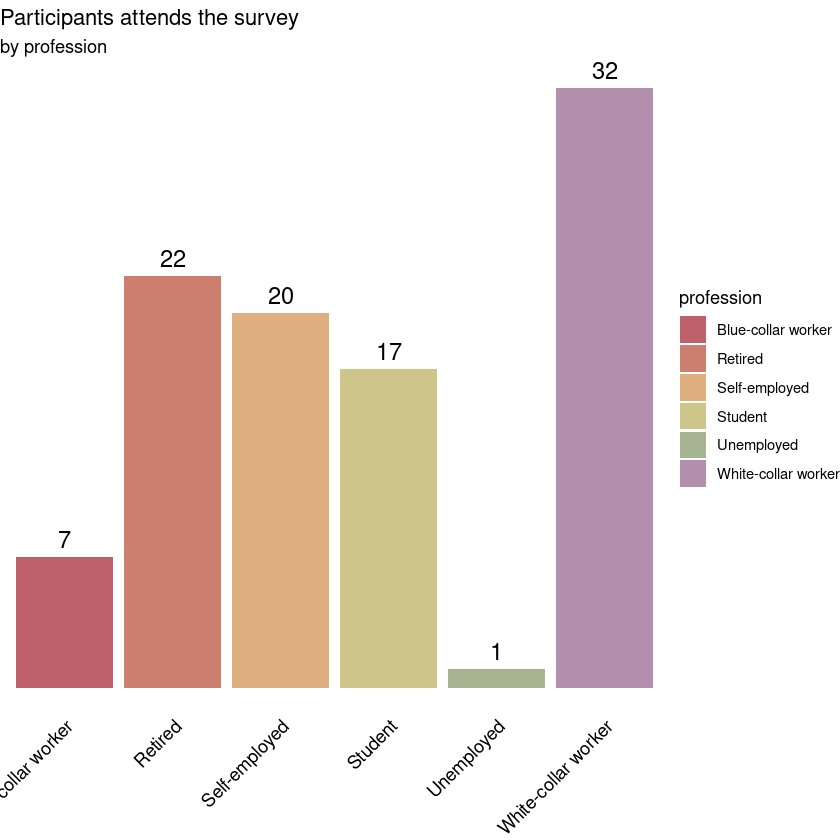

In [103]:
# Show the distribution of participants' profession    
profession_count <- data %>%
    group_by(
        profession
        )%>%
    summarize(
        profession = first(profession),
        count = n()
        )%>%
    mutate(
        profession = case_when(
            profession == "1" ~ "Student",
            profession == "2" ~ "White-collar worker",
            profession == "3" ~ "Blue-collar worker",
            profession == "4" ~ "Self-employed",
            profession == "5" ~ "Retired",
            profession == "6" ~ "Unemployed"
            ))

profession_count

# Plot the graph of the distribution
profession_count %>%
    ggplot(
        aes(
            x = profession,
			y = count,
            fill = profession
        )
	)+
    geom_bar(
		stat = 'identity'
	)+
	geom_text(
		aes(
      		label = count
    	),
    	color ="black",
		size = 5,
    	vjust = -0.5
	)+
    labs(
        title = "Participants attends the survey",
        subtitle = "by profession",
        x = "Profession",
        y = "Number of participants"
    )+
	scale_fill_nord(
		"aurora"
	)+
	theme_void()+
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)
    )

It's noticable that 17.2% are student, 39.4% are workers, in which 32.3% are white-collar and 7.1% are blue-collar. 
Self-employed come up with 20.2% while 22.2 % of the audience are retired. Only 1% of them are unemployed.   
- Majority of the respondents belongs to the working force (59.6%)
- Minority are respondents with no job / retired (23.2%) or students (17.2

### Age & gender of the participants

In [104]:
    data %>%
        group_by(gender)%>%
        summarize(
            total = n()) %>%
        mutate(
            gender = case_when(
                gender == "1" ~ "Male",
                gender == "2" ~ "Female",
                gender == "3" ~ "Non-binary/Third gender"
            ))

gender,total
<chr>,<int>
Male,47
Female,51
Non-binary/Third gender,1


-   Gender is almost divided into halves with males are **47.5%** and females are **51.5%**.   
-   There is only **1%** of the participants who is from Non-binary/Third gender.

#### Age of participants

In [105]:
data %>%
    summarize(
        min  = min(age),
        max  = max(age),
        sd   = sd(as.numeric(age)),
        mean = mean(as.numeric(age)),
        total = n()
        )

min,max,sd,mean,total
<dbl>,<dbl>,<dbl>,<dbl>,<int>
16,66,15.06412,43.30303,99


-   Age of the sample range from 16-66 with majority in the adult age.   
-   The average of the respondents' age is 43.3 with standard deviation of 15.1

#### Determine age in each range
We will divide the participants into 3 groups of age:
- Young adults: 16-30, expected to be students or entry-level/junior workers
- Adults: 31-55, the main working force, can be expected to be seniors in their jobs
- Old adults: 56-66, established career/retired

age,total
<chr>,<int>
16-30,27
31-55,42
56-66,30


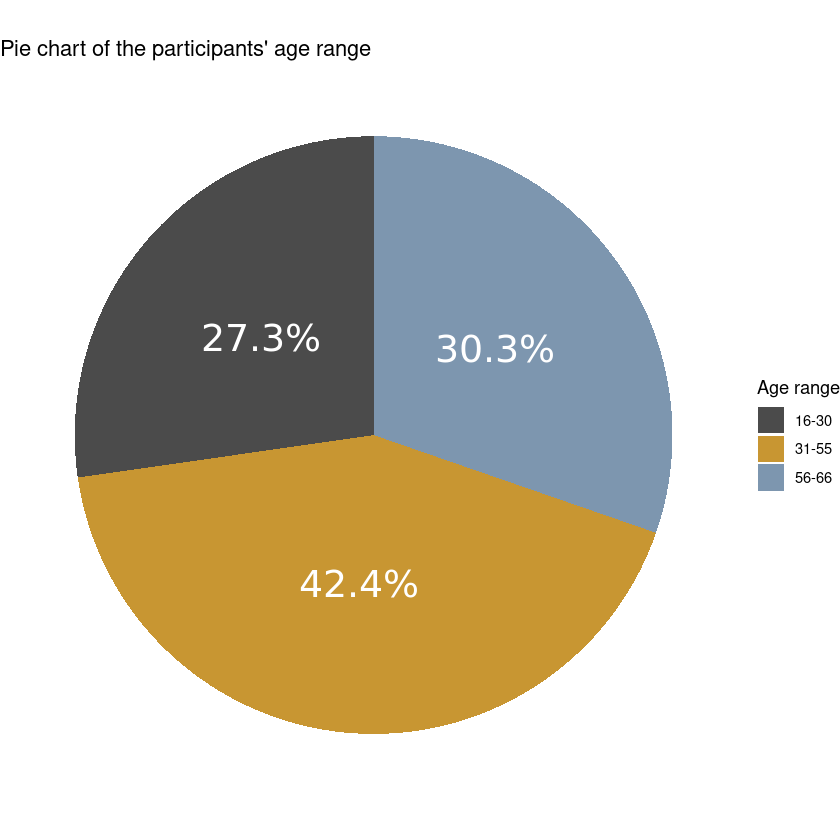

In [156]:
age_range <- data %>%
    group_by(age)%>%
    mutate(
        age = case_when(
            15 < age & age < 31 ~ "16-30",
            30 < age & age < 56 ~ "31-55",
            55 < age & age < 67 ~ "56-66"
            ))%>%
    summarize(
        total = n()
    )

age_range

age_range %>%
    ggplot(
        aes(
            x = "",
            y = total/99,
            fill = age
        ))+
    geom_bar(
        stat = "identity",
        width = 1
        )+
    coord_polar(
        "y",
        start = 0
        )+
    geom_text(
        aes(label = percent(total/99)),
        position = position_stack(vjust= 0.5),
        color = "white",
        size = 8,
		family = 'bold'
        )+
    labs(
        title = "Pie chart of the participants' age range",
        x = "",
        y = "",
        fill = "Age range"
        )+
	scale_fill_nord(
		"algoma_forest"
	)+
    theme_void(
        )

- 42.4% are in the adult group, which is also the majority of the participants
- The number of young adults and old adults are not too different, with 27 and 30, respectively

#### Age - Gender relationship

In [107]:
    data %>%
    mutate(
        age = case_when(
            15 < age & age < 31 ~ "16-30",
            30 < age & age < 56 ~ "31-55",
            55 < age & age < 67 ~ "56-66"
        )
    )%>%
    group_by(gender, age)%>%
    summarize(
        people_no = n()
    )%>%
    mutate(
        gender = case_when(
            gender == "1" ~ "Male",
            gender == "2" ~ "Female",
            gender == "3" ~ "Non-binary/Third gender"
        )
    )%>%
    pivot_wider(
        names_from = gender,
        values_from = people_no
    )

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


age,Male,Female,Non-binary/Third gender
<chr>,<int>,<int>,<int>
16-30,13,13,1
31-55,21,21,NA
56-66,13,17,NA


We can observe that the gender of participants from 16 to 55 in of the participants are equal while there are more female compared to male in the last age range.  

### Language

- All of the responsdents are Austrian, however, the majority of the language responsed are in English.   
- At least 64.6% of the audience are able to speak English - which is a non-native language in Austria.

In [108]:
data %>%
    group_by(lang)%>%
    summarize(n())

lang,n()
<fct>,<int>
EN,64
DE,35


<a id="3.3"></a>
## 3.3. Find the mean of the variables in the dataset

The dataset is consists of multiple variables represent the characteristics of the participants. In each of the characteristics, 
there are supportive variables work as supporters for the characteristic.   

In order to make all the supportive variables correctly represent 
the main traits, we will calculate their means and use them as the value for future analysis.  

For *Brand exposure*, due to the fact that we have *Brand pre-exposure* and *Brand post exposure*, we will estimate and use **the difference** between them in order to fully reflect the characteristics of this variable group

In [109]:
data <- data %>%
    rowwise(
    )%>%
    mutate(
        brand_exposure_difference = 
            mean(c(brand_post_like, brand_post_positivity, brand_post_good, brand_post_favorite)) -
            mean(c(brand_pre_like, brand_pre_positivity, brand_pre_good, brand_pre_favorite)),
        product_attitude = 
            mean(c(product_like, product_positivity, product_good, product_favorite)),
        product_quality = 
            mean(c(quality, quality_durability, quality_reliability)),
        trust = 
            mean(c(trust_depend, trust_honesty, trust_reliability, trust_sincerity, trust_worthy)),
        intent = 
            mean(c(intent_purchase, intent_consider, intent_probability)),
        market_commit = 
            mean(c(market_return, market_purchase_3m, market_purchase_1y, market_product_only)),
        product_interest_mean = 
            mean(c(product_interest, product_relevant, product_involve)),
        internet_mean = 
            mean(c(internet_freq, internet_freq_compare, internet_heavy, internet_sites_visit)),
        brand_familiarity_mean = 
            mean(c(brand_familiarity, brand_recognization, brand_heard))
    )%>%
    ungroup() # Remove rowwise grouping

head(data[, c("brand_exposure_difference", "product_attitude", "product_quality", "trust", "intent", "market_commit")])


brand_exposure_difference,product_attitude,product_quality,trust,intent,market_commit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2.00,4.25,3.000000,2.0,1.000000,2.25
0.00,4.00,5.000000,2.8,4.333333,4.00
-0.75,5.75,6.333333,4.6,5.333333,5.50
-1.00,4.00,6.333333,3.4,4.666667,5.25
1.50,4.25,3.000000,2.6,2.666667,3.00
0.25,4.50,5.000000,5.0,2.666667,4.75


<a id="3.4"></a>
## 3.4. Correlation

Determine correlations between variables

In [110]:
data %>%
    dplyr::select(age, brand_exposure_difference, product_attitude, product_quality, trust, intent, market_commit, product_interest_mean, internet_mean, brand_familiarity_mean
    )%>%
    cor()

,age,brand_exposure_difference,product_attitude,product_quality,trust,intent,market_commit,product_interest_mean,internet_mean,brand_familiarity_mean
age,1.00000000,0.03852304,0.1221847,-0.14857175,-0.05029527,0.05795766,-0.05565806,0.27201695,-0.31964992,0.12542479
brand_exposure_difference,0.03852304,1.00000000,0.2624565,0.37965156,0.38714018,0.35144135,0.32793674,0.05086669,-0.04726782,0.03679483
product_attitude,0.12218466,0.26245655,1.0000000,0.32774296,0.34285725,0.39356068,0.39070540,0.22847204,-0.15024777,0.09264230
product_quality,-0.14857175,0.37965156,0.3277430,1.00000000,0.82749466,0.79600773,0.71073480,0.28239711,0.20729878,0.09076077
trust,-0.05029527,0.38714018,0.3428573,0.82749466,1.00000000,0.76361362,0.71737797,0.28724483,0.14977313,0.01811673
intent,0.05795766,0.35144135,0.3935607,0.79600773,0.76361362,1.00000000,0.75199281,0.41808262,0.14981105,0.15331195
market_commit,-0.05565806,0.32793674,0.3907054,0.71073480,0.71737797,0.75199281,1.00000000,0.24607331,0.27655388,0.11629647
product_interest_mean,0.27201695,0.05086669,0.2284720,0.28239711,0.28724483,0.41808262,0.24607331,1.00000000,-0.04434950,0.16342516
internet_mean,-0.31964992,-0.04726782,-0.1502478,0.20729878,0.14977313,0.14981105,0.27655388,-0.04434950,1.00000000,0.25840144
brand_familiarity_mean,0.12542479,0.03679483,0.0926423,0.09076077,0.01811673,0.15331195,0.11629647,0.16342516,0.25840144,1.00000000


**The correlation matrix presents the correlations between variables in the dataset.**
   

We can see the relationship between each pair of variables in the dataset:   
   
-   Positive correlation coefficient = Positive relationship, one increases, the other will also increase and vice versa   
   
-   Negative correlation coefficient = Negative relationship, one decreases, the other will increase and vice versa   
   
-   Close to 0: Weak relationship   
   

For example, we can take a look at:   
-   *Trust - Intent (0.76)*, *Trust - Market Commitment (0.71)*, this shows that if trust increases, intention and Market Commitment 
   
will also increase.   
   
-   *Age - Internet usage (-0.31)* shows that older participants tend to use the Internet less frequent.   

<a id="3.5"></a>
## 3.5. AN(C)OVA Test / Effect size / Post-hoc test

**Due to limits of summarize() function, we will have to calculate the means again in certain parts**. Tests will be conducted for each dependent variables.

### A. Brand Exposure Difference (Pre-Post) ~ Review
Mean difference and Standard deviation difference between Post and Pre exposure:   

In [111]:
data %>%
    group_by(review) %>%
    summarize(
            mean_difference = 
                mean(
                    c(brand_post_like, brand_post_positivity, 
                    brand_post_good, brand_post_favorite)) -
                mean(
                    c(brand_pre_like, brand_pre_positivity, 
                    brand_pre_good, brand_pre_favorite)),
            sd_difference = 
                sd(
                    c(brand_post_like, brand_post_positivity,   
                    brand_post_good, brand_post_favorite)) -
                sd(
                    c(brand_pre_like, brand_pre_positivity,     
                    brand_pre_good, brand_pre_favorite)), 
            count = n()
    )

review,mean_difference,sd_difference,count
<fct>,<dbl>,<dbl>,<int>
1,-0.6650000,-0.2152842,50
0,0.1530612,-0.1636605,49


ANOVA/ Effect size/ Post-hoc test:

We will conduct the ANOVA test by using aov() function:
- `~` represents the relationship between the response variables(dependent variables) and the predictors (review)
- use `+` to add other predictors to the model(gender, profession, language)

For other dependent variables, we will keep using the similar method

In [112]:
aov_model <- aov(
    brand_exposure_difference ~ review + gender + profession + lang, data
)

aov_model %>% Anova(type = "III") %>% broom::tidy() # ANOVA test

etaSquared(aov_model)   # Calculate effect size: partial eta-squared

term,sumsq,df,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.7245672,1,9.6225035,2.575359e-03
review,16.1403296,1,17.8014995,5.887985e-05
gender,1.3296536,2,0.7332511,4.832237e-01
profession,1.4761209,5,0.3256088,8.963326e-01
lang,0.1681128,1,0.1854150,6.678014e-01
Residuals,80.6948503,89,NA,NA


,eta.sq,eta.sq.part
review,0.160816478,0.166678367
gender,0.013248194,0.016210444
profession,0.014707542,0.017964020
lang,0.001675015,0.002078983


-   *Review* has a significant effect on the difference of *Brand exposure* (p < 0.05).   
-   The effect size is large -> *Review* has a significant impact on the difference of *Brand pre/post exposure*. 
-   It's noticable that the etaSquared table matches the result of the ANCOVA model, with *review* has a significant low p-value, thus having a stronger effect on the difference of *Brand pre/post exposure* compared to other factors.   

In [113]:
    TukeyHSD(aov_model, conf.level = .95) # Post-hoc Tukey's HSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = brand_exposure_difference ~ review + gender + profession + lang, data = data)

$review
         diff       lwr      upr    p adj
0-1 0.8180612 0.4377355 1.198387 4.81e-05

$gender
           diff        lwr       upr     p adj
2-1 -0.04368633 -0.5026003 0.4152276 0.9720260
3-1 -1.18756188 -3.4811948 1.1060710 0.4363697
3-2 -1.14387555 -3.4356338 1.1478827 0.4624089

$profession
           diff        lwr       upr     p adj
2-1  0.18670405 -0.6456887 1.0190968 0.9864135
3-1  0.08114732 -1.1644046 1.3266993 0.9999648
4-1  0.13714395 -0.7777929 1.0520808 0.9979275
5-1  0.32659163 -0.5690334 1.2222166 0.8949353
6-1  0.81650768 -2.0374104 3.6704258 0.9604951
3-2 -0.10555673 -1.2628356 1.0517221 0.9998146
4-2 -0.04956011 -0.8401321 0.7410118 0.9999709
5-2  0.13988758 -0.6282522 0.9080274 0.9947927
6-2  0.62980363 -2.1867089 3.4463162 0.9866005
4-3  0.05599662 -1.1620042 1.2739974 0.9999938
5-3  0.

-   Mean value of *Brand exposure attitude difference* for *real reviews (0)* is 0.818 higher than mean value of *Brand exposure attitude difference* for *fake review (1)*. This means that with *real review*, the *Brand exposure attitude* changes more compared to *fake review* or *fake review* tends to change *brand exposure* considerably less compared to *real review*.   
-   With a very small p-value, we can say that the estimated difference is significant. There is a significant difference in *Brand exposure* between *Fake and real review*.

### B. Product Attitude ~ Review
Mean and standard deviation of Product attitude

In [114]:
data %>%
	group_by(review) %>%
        summarize(
            mean = mean(c(product_like, product_positivity, product_good, product_favorite)),
            sd = sd(c(product_like, product_positivity, product_good, product_favorite)),
            count = n()
        )

review,mean,sd,count
<fct>,<dbl>,<dbl>,<int>
1,4.535000,1.2024995,50
0,4.969388,0.7225891,49


ANOVA/ Effect size/ Post-hoc test:

In [115]:
data <- data %>%
    rowwise(
	)%>%
    mutate(
		product_att_mean = mean(c(product_like, product_positivity, product_good, product_favorite))
    )%>%
    ungroup() # Remove rowwise grouping

aov_model <- aov(
	product_att_mean ~ review + gender + profession + lang, data = data
)

aov_model %>% Anova(type = "III") %>% broom::tidy()

etaSquared(aov_model)   # Calculate effect size: partial eta-squared

term,sumsq,df,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),243.559299,1,313.403297,6.597452e-31
review,5.404410,1,6.954199,9.867812e-03
gender,1.669087,2,1.073860,3.460722e-01
profession,8.668911,5,2.230968,5.803031e-02
lang,0.560747,1,0.721549,3.979155e-01
Residuals,69.165761,89,NA,NA


,eta.sq,eta.sq.part
review,0.064530263,0.072474147
gender,0.019929392,0.023563071
profession,0.103509389,0.111375959
lang,0.006695487,0.008042093


-   *Review*, *Gender*, *Profession* and *Language* have significant effect on *Product atttitude* (p < 0.05).   
-   Etasq of review is high. This shows that review has a significant impact on *Product atttitude*. This also suggests that the difference between *Fake & Real reviews* has an impact on *Product atttitude*.   

In [116]:
TukeyHSD(aov_model, conf.level = .95) # Post-hoc Tukey's HSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = product_att_mean ~ review + gender + profession + lang, data = data)

$review
         diff        lwr       upr     p adj
0-1 0.4343878 0.08227777 0.7864977 0.0161891

$gender
          diff       lwr       upr     p adj
2-1  0.1036509 -0.321217 0.5285188 0.8303580
3-1 -0.9253387 -3.048811 1.1981335 0.5545913
3-2 -1.0289896 -3.150726 1.0927470 0.4825561

$profession
           diff          lwr       upr     p adj
2-1 -0.18714479 -0.957783775 0.5834942 0.9806077
3-1 -0.49612953 -1.649276137 0.6570171 0.8092008
4-1 -0.03626533 -0.883324573 0.8107939 0.9999956
5-1 -0.13851269 -0.967692823 0.6906674 0.9965308
6-1  2.41218625 -0.230004549 5.0543770 0.0940531
3-2 -0.30898474 -1.380407033 0.7624376 0.9591428
4-2  0.15087947 -0.581041300 0.8828002 0.9907502
5-2  0.04863210 -0.662520717 0.7597849 0.9999553
6-2  2.59933104 -0.008229285 5.2068914 0.0512150
4-3  0.45986421 -0.667775210 1.5875036 0.8415

-   Mean value of *Product attitude* for *real reviews (0)* is 0.434 larger than mean value of *Product attitude* for *fake review (1)*. With very small p-value, we can say that the estimated diff is significant. There is a significant difference in *Product attitude* between *Fake and real review*.   
-   Mean value of *Product attitude* for *Profession6 (Unemployed)* is 2.90 larger than mean value of *Product attitude* for *Profession3 (Blue-collar worker)*. With very small p-value, we can say that the estimated diff is significant. ***Product attitude of the Unemployed is very likely to be larger than blue-collar worker participants'***.   

### C. Perceived Quality ~ Review
Mean and standard deviation of Perceived quality

In [117]:
data %>%
    group_by(review)%>%
    summarize(
        mean = mean(c(quality, quality_durability, quality_reliability)),
        sd = sd(c(quality, quality_durability, quality_reliability)),
        count = n()
    )

review,mean,sd,count
<fct>,<dbl>,<dbl>,<int>
1,3.226667,1.1651924,50
0,5.265306,0.9603547,49


ANOVA/ Effect size/ Post-hoc test:

In [118]:
data <- data %>%
	rowwise(
	)%>%
    mutate(
        quality_mean = mean(c(quality, quality_durability, quality_reliability))
    )%>%
	ungroup() # Remove rowwise grouping

aov_model <- aov(
    quality_mean ~ review + gender + profession + lang, data = data
)

aov_model %>% Anova(type = "III") %>% broom::tidy()

etaSquared(aov_model)   # Calculate effect size: partial eta-squared

term,sumsq,df,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),144.214272,1,174.9712509,1.003483e-22
review,98.182678,1,119.1223714,4.230202e-18
gender,1.508843,2,0.9153191,4.041244e-01
profession,4.089705,5,0.9923854,4.270828e-01
lang,2.334551,1,2.8324475,9.588248e-02
Residuals,73.355309,89,NA,NA


,eta.sq,eta.sq.part
review,0.534083656,0.57236697
gender,0.008207643,0.02015441
profession,0.022246738,0.05280785
lang,0.012699243,0.03084365


-   *Review*, *Gender*, *Profession* and *Language* have significant effect on *Product atttitude* (p < 0.05).   
-   Etasq of review is high. This shows that *review* has a significant impact on *Quality perception*. 
This also suggests that the difference between *Fake & Real reviews* has an impact on *Quality perception*.  

In [119]:
TukeyHSD(aov_model, conf.level = .95) # Post-hoc Tukey's HSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = quality_mean ~ review + gender + profession + lang, data = data)

$review
        diff      lwr      upr p adj
0-1 2.038639 1.676022 2.401257     0

$gender
           diff       lwr       upr     p adj
2-1  0.02129442 -0.416252 0.4588408 0.9926093
3-1 -1.26713562 -3.453974 0.9197032 0.3550909
3-2 -1.28843004 -3.473482 0.8966214 0.3424451

$profession
           diff        lwr       upr     p adj
2-1 -0.34067912 -1.1343148 0.4529565 0.8106681
3-1 -0.23899109 -1.4265488 0.9485666 0.9917183
4-1 -0.59028541 -1.4626218 0.2820510 0.3671285
5-1 -0.44880332 -1.3027271 0.4051204 0.6454709
6-1 -0.56629892 -3.2873354 2.1547376 0.9903363
3-2  0.10168803 -1.0017066 1.2050827 0.9998050
4-2 -0.24960628 -1.0033683 0.5041558 0.9278565
5-2 -0.10812420 -0.8404986 0.6242502 0.9980727
6-2 -0.22561980 -2.9109924 2.4597528 0.9998763
4-3 -0.35129431 -1.5125837 0.8099950 0.9500950
5-3 -0.20981223 -1.3573348 0.93771

Mean value of *Quality perception* for *real reviews (0)* is 2.038 larger than mean value of *Quality perception* for fake review (1). With very small p-value, we can say that the estimated diff is significant. *Quality perception* in real review is likely to be larger than fake review's.

### D. Consumer Trust ~ Review
Mean and standard deviation of Trust

In [120]:
data %>%
	group_by(review) %>%
    summarize(
        mean = mean(c(trust_depend, trust_honesty, trust_reliability, trust_sincerity, trust_worthy)),
        sd = sd(c(trust_depend, trust_honesty, trust_reliability, trust_sincerity, trust_worthy)),
        count = n()
    )

review,mean,sd,count
<fct>,<dbl>,<dbl>,<int>
1,2.652000,1.131378,50
0,5.187755,1.172365,49


ANOVA/ Effect size/ Post-hoc test:

In [121]:
data <- data %>%
    rowwise() %>%
    mutate(
        trust_mean = mean(c(trust_depend, trust_honesty, trust_reliability, trust_sincerity, trust_worthy))
    ) %>%
ungroup() # Remove rowwise grouping

aov_model <- aov(
    trust_mean ~ review + gender + profession + lang, data = data
    )

aov_model %>% Anova(type = "III") %>% broom::tidy()

etaSquared(aov_model)   # Calculate effect size: partial eta-squared

term,sumsq,df,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),81.9127993,1,103.2077082,1.503435e-16
review,158.7025224,1,199.9604916,1.755563e-24
gender,2.1929657,2,1.3815360,2.565262e-01
profession,10.3310387,5,2.6033607,3.029779e-02
lang,0.5893341,1,0.7425436,3.911631e-01
Residuals,70.6365761,89,NA,NA


,eta.sq,eta.sq.part
review,0.652063560,0.691999417
gender,0.009010273,0.030110936
profession,0.042447302,0.127594702
lang,0.002421406,0.008274154


-   *Review*, *Gender*, *Profession* and *Language* have significant effect on *Consumer Trust* (p < 0.05).   
-   Etasq of review is high. This shows that review has a significant impact on *Consumer Trust*. This also suggests that the difference between *Fake & Real reviews* has an impact on *Consumer Trust*.  

In [122]:
TukeyHSD(aov_model, conf.level = .95) # Post-hoc Tukey's HSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = trust_mean ~ review + gender + profession + lang, data = data)

$review
        diff      lwr      upr p adj
0-1 2.535755 2.179921 2.891589     0

$gender
         diff        lwr       upr     p adj
2-1 -0.107621 -0.5369825 0.3217406 0.8218411
3-1 -1.457923 -3.6038540 0.6880086 0.2428423
3-2 -1.350302 -3.4944791 0.7938757 0.2953363

$profession
           diff        lwr       upr     p adj
2-1  0.03115952 -0.7476302 0.8099492 0.9999969
3-1  0.49720645 -0.6681365 1.6625494 0.8145555
4-1 -0.35483813 -1.2108564 0.5011801 0.8321725
5-1 -0.02217302 -0.8601231 0.8157770 0.9999996
6-1  2.48412584 -0.1860104 5.1542620 0.0833305
3-2  0.46604693 -0.6167074 1.5488012 0.8089183
4-2 -0.38599765 -1.1256596 0.3536644 0.6524084
5-2 -0.05333254 -0.7720069 0.6653419 0.9999330
6-2  2.45296632 -0.1821731 5.0881058 0.0830196
4-3 -0.85204458 -1.9916106 0.2875214 0.2584811
5-3 -0.51937947 -1.6454362 0.6066772 0.7

-   Mean value of *Consumer Trust* for *real reviews (0)* is 2.536 larger than mean value of *Consumer Trust* for *fake review* (1). With very small p-value, we can say that the estimated diff is significant. Consumer Trust in real review is likely to be larger than fake review's.   
-   Mean value of *Consumer Trust* for *Profession6 (0)* is 2.838 larger than mean value of *Consumer Trust* for *Profession4 (1)*. With very small p-value, we can say that the estimated diff is significant. Consumer Trust of the Unemployed is likely to be larger than the self-employed participants.    

### E. Purchase Intention ~ Review
Mean and standard deviation of purchase intention ~ Review

In [123]:
data %>%
    group_by(review) %>%
    summarize(
        mean = mean(c(intent_purchase, intent_consider, intent_probability)),
        sd = sd(c(intent_purchase, intent_consider, intent_probability)),
        count = n()
    )

review,mean,sd,count
<fct>,<dbl>,<dbl>,<int>
1,3.073333,1.187726,50
0,5.040816,1.265331,49


ANOVA/ Effect size/ Post-hoc test:

In [124]:
data <- data %>%
    rowwise()%>%
    mutate(
        intent_mean = mean(c(intent_purchase, intent_consider, intent_probability))
    )%>%
    ungroup() # Remove rowwise grouping

aov_model <- aov(
            intent_mean ~ review + gender + profession + lang, data = data
            ) 

aov_model %>% Anova(type = "III") %>% broom::tidy()

etaSquared(aov_model)   # Calculate effect size: partial eta-squared

term,sumsq,df,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),94.0312310,1,70.2876693,7.056274e-13
review,91.4970142,1,68.3933605,1.210498e-12
gender,0.5704683,2,0.2132105,8.083975e-01
profession,3.2396617,5,0.4843248,7.871204e-01
lang,2.6285188,1,1.9647989,1.644789e-01
Residuals,119.0646899,89,NA,NA


,eta.sq,eta.sq.part
review,0.413385932,0.43453777
gender,0.002577391,0.00476840
profession,0.014636877,0.02648852
lang,0.011875717,0.02159955


-   *Review*, *Gender*, *Profession* and *Language* have significant effect on *Purchase Intention* (p < 0.05).   
-   Etasq of review is high. This shows that *review* has a significant impact on *Purchase Intention*. This also suggests that the difference between *Fake & Real reviews* has an impact on *Purchase Intention*.  

In [125]:
TukeyHSD(aov_model, conf.level = .95) # Post-hoc Tukey's HSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = intent_mean ~ review + gender + profession + lang, data = data)

$review
        diff      lwr      upr p adj
0-1 1.967483 1.505502 2.429464     0

$gender
           diff        lwr       upr     p adj
2-1  0.02748367 -0.5299585 0.5849259 0.9924158
3-1 -0.70039948 -3.4864725 2.0856735 0.8208915
3-2 -0.72788315 -3.5116790 2.0559127 0.8077891

$profession
           diff        lwr       upr     p adj
2-1  0.18183424 -0.8292722 1.1929407 0.9950904
3-1  0.12087718 -1.3920932 1.6338476 0.9999035
4-1 -0.03524193 -1.1466146 1.0761307 0.9999990
5-1  0.30356754 -0.7843470 1.3914821 0.9644784
6-1  1.41716048 -2.0494903 4.8838112 0.8401761
3-2 -0.06095706 -1.4667022 1.3447881 0.9999954
4-2 -0.21707617 -1.1773829 0.7432306 0.9859282
5-2  0.12173330 -0.8113251 1.0547917 0.9989367
6-2  1.23532624 -2.1858880 4.6565405 0.8988070
4-3 -0.15611911 -1.6356232 1.3233850 0.9996212
5-3  0.18269036 -1.2792745 1.64

Mean value of *Purchase Intention* for *real reviews* (0) is 1.967 larger than mean value of *Purchase Intention* for *fake review (1)*. With very small p-value, we can say that the estimated diff is significant. ***Purchase Intention in real review is likely to be larger than fake review's.***

### F. Market Commitment ~ Review
Mean and standard deviation of Market commitment

In [126]:
data %>%
    group_by(review) %>%
    summarize(
        mean = mean(c(market_return, market_purchase_3m, market_purchase_1y, market_product_only)),
        sd = sd(c(market_return, market_purchase_3m, market_purchase_1y, market_product_only)),
        count = n()
    )

review,mean,sd,count
<fct>,<dbl>,<dbl>,<int>
1,3.460000,1.594085,50
0,5.193878,1.229202,49


ANOVA/ Effect size/ Post-hoc test:

In [127]:
data <- data %>%
    rowwise() %>%
    mutate(
        market_commit = mean(c(market_return, market_purchase_3m, market_purchase_1y, market_product_only)),
    ) %>%
    ungroup() # Remove rowwise grouping

aov_model <- aov(
    market_commit ~ review + gender + profession + lang, data = data
)

aov_model %>% Anova(type = "III") %>% broom::tidy()

etaSquared(aov_model)   # Calculate effect size: partial eta-squared

term,sumsq,df,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.404569e+02,1,8.860311e+01,5.243962e-15
review,8.948143e+01,1,5.644675e+01,4.284043e-11
gender,2.319269e+00,2,7.315216e-01,4.840466e-01
profession,2.198407e+01,5,2.773602e+00,2.244761e-02
lang,2.086597e-04,1,1.316269e-04,9.908718e-01
Residuals,1.410860e+02,89,NA,NA


,eta.sq,eta.sq.part
review,3.730689e-01,3.880922e-01
gender,9.669574e-03,1.617283e-02
profession,9.165671e-02,1.348136e-01
lang,8.699511e-07,1.478952e-06


-   *Review*, *Gender*, *Profession* and *Language* have significant effect on *Market commitment* (p < 0.05).   
-   Etasq of review is high. This shows that review has a significant impact on *Market commitment*. This also suggests that the difference between *Fake & Real reviews* has an impact on *Market commitment*.   

In [128]:
TukeyHSD(aov_model, conf.level = .95) # Post-hoc Tukey's HSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = market_commit ~ review + gender + profession + lang, data = data)

$review
        diff      lwr     upr p adj
0-1 1.733878 1.230986 2.23677     0

$gender
          diff        lwr      upr     p adj
2-1 -0.2172707 -0.8240773 0.389536 0.6708876
3-1 -1.0665784 -4.0993730 1.966216 0.6803486
3-2 -0.8493077 -3.8796236 2.181008 0.7826000

$profession
           diff         lwr       upr     p adj
2-1  0.32840507 -0.77224025 1.4290504 0.9528678
3-1 -0.14622133 -1.79317333 1.5007307 0.9998377
4-1 -0.44023951 -1.65003011 0.7695511 0.8957603
5-1 -0.24291162 -1.42716683 0.9413436 0.9909593
6-1  3.41025317 -0.36338794 7.1838943 0.1001974
3-2 -0.47462640 -2.00485775 1.0556050 0.9446647
4-2 -0.76864459 -1.81399161 0.2767024 0.2758446
5-2 -0.57131669 -1.58700243 0.4443690 0.5756766
6-2  3.08184809 -0.64233293 6.8060291 0.1638553
4-3 -0.29401819 -1.90454020 1.3165038 0.9947325
5-3 -0.09669029 -1.68811993 

-   Mean value of *Market commitment* for *real reviews* (0) is 1.734, larger than mean value of *Market commitment* for *fake review (1)*. 
-   With very small p-value, we can say that the estimated diff is significant. ****Market commitment* in real review is likely to be larger than fake review's.***   
   
   
-   Mean value of *Market commitment* for *Profession6* (0) is 3.850, larger than mean value of Market commitment for Profession4 (1). 
-   With very small p-value, we can say that the estimated diff is significant. ***Market commitment of the Unemployed is likely to be larger than the self-employed participants.***   

<a id="3.6"></a>
## 3.6. Regression Analysis

In this section, we will conduct multiple regression analyses to explore the relationships between the dependent variables and the covariates.

Dependent variable:
+ Brand Exposure Diffence
+ Product Attitude
+ Product Quality
+ Consumer Trust
+ Purchase Intent
+ Market Commitment

Covariates:
+ Brand Familiarity
+ Internet Usage
+ Product Interest

To do regression analysis, we will ultilize the function lm(), present the relationship between the dependent variables and of the covariates using `~` and `+`.

### A. Brand Exposure Difference ~ Covariates 

In [129]:
data %>%
    lm(
		brand_exposure_difference ~ brand_familiarity_mean + internet_mean + 						product_interest_mean, data = .
		)%>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.63267022,1.19472187,-0.5295544,0.5976563
brand_familiarity_mean,0.04008099,0.09624152,0.4164626,0.6780110
internet_mean,-0.05194256,0.09681408,-0.5365187,0.5928543
product_interest_mean,0.10206480,0.25905455,0.3939896,0.6944717


The result suggests positive relationship between Brand familiarity (0.0401), Product interest (0.102) and Brand exposure difference, as well as a negative relationship (-0.0519) between it and Internet usage. However, they are not statistically significant.   

### B. Product Attitude ~ Covariates 

In [130]:
data %>%
    lm(
		product_attitude ~ brand_familiarity_mean + internet_mean + product_interest_mean, data 		= .
		)%>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.09111721,1.04939642,2.9456144,0.004053412
brand_familiarity_mean,0.08378952,0.08453474,0.9911844,0.324113416
internet_mean,-0.13951712,0.08503766,-1.6406510,0.104176870
product_interest_mean,0.46438567,0.22754326,2.0408676,0.044038219


The result suggests positive relationship between Brand familiarity (0.0838) and Product attitude, 
as well as a negative relationship (-0.140) between it and Internet usage. However, they are not statistically significant.   

On the other hand, Product attitude has a positive (0.464) and significant (p<0.05) relationship with Product interest.  

### C. Perceived Quality ~ Covariates

In [131]:
data %>%
    lm(
		product_quality ~ brand_familiarity_mean + internet_mean + product_interest_mean, data 			= .
		) %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.18176851,1.5144448,-0.7803312,0.437135947
brand_familiarity_mean,-0.01863575,0.1219970,-0.1527558,0.878914824
internet_mean,0.27653791,0.1227228,2.2533545,0.026536646
product_interest_mean,0.99316192,0.3283809,3.0244206,0.003203762


The result suggests a negative relationship (-0.0186) between Product Quality and Brand familiarity. However, they are not statistically significant.   

On the other hand, Product attitude has a positive and significant (p<0.05) relationship with Product interest (0.993) and Internet usage (0.277).  

### D. Consumer Trust ~ Covariates

In [132]:
data %>%
    lm(
		trust ~ brand_familiarity_mean + internet_mean + product_interest_mean, data = .
		)%>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.7699379,1.7561521,-1.0078500,0.316086651
brand_familiarity_mean,-0.1111907,0.1414679,-0.7859785,0.433836170
internet_mean,0.2610849,0.1423095,1.8346275,0.069690634
product_interest_mean,1.1954518,0.3807909,3.1393920,0.002256123


The result suggests a negative relationship (-0.111) between Trust - Brand familiarity and a positive one (0.261) between Trust - Internet usage. However, they are not statistically significant.   

On the other hand, Trust has a positive (1.196) and strong significant (p<<0.05) relationship with Product interest (1.2).  

### E. Purchase Intention ~ Covariates 

In [133]:
data %>%
    lm(
		intent ~ brand_familiarity_mean + internet_mean + product_interest_mean, data = .
	)%>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.73726248,1.5870537,-2.3548431,2.058818e-02
brand_familiarity_mean,0.05909909,0.1278460,0.4622676,6.449464e-01
internet_mean,0.21211841,0.1286066,1.6493583,1.023772e-01
product_interest_mean,1.54398056,0.3441249,4.4866871,2.027192e-05


The result suggests a positive relationship between Intention - Brand familiarity (0.059) and Internet usage(0.212). However, they are not statistically significant.   

On the other hand, Intention has a positive (1.544) and strong significant (p<<0.05) relationship with Product interest (1.54). 

### F. Market Commitment ~ Covariates

In [134]:
data %>%
    lm(
		market_commit ~ brand_familiarity_mean + internet_mean + product_interest_mean, data = .
	)%>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.8677152484,1.7149441,-1.089082296,0.278872623
brand_familiarity_mean,-0.0006646286,0.1381483,-0.004810978,0.996171498
internet_mean,0.4057075764,0.1389702,2.919385487,0.004379410
product_interest_mean,0.9961907544,0.3718556,2.678971739,0.008703774


The result suggests a negative relationship between Market commitment - Brand familiarity (-0.000665). However, it's not statistically significant.   

On the other hand, Market Commitment has positive and strong significant (p<<0.05) relationships with Product interest (0.996) and Internet usage (0.406).  

## 3.7. Mediation Analysis
Investigate: <span style="color: #171b23">**Dependent variables**</span> as **mediation** between ***Purchase intenion and Fake reviews***

By using mediation analysis, we will find out if other dependent variables are contributing to the impact of *fake reviews* on participants' *purchase intention*

To do mediation analysis, we will first create 2 linear regression models with **ln()**. The A model will represent the relation ship between the dependent variable and *fake reviews* while the B model represents the relationship between *review* and *purchase intention* having the dependent variable as the mediator.

After that we will conduct mediation analysis by using function mediate()

### A. Intent ~ Review + Brand Exposure Difference 

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -0.1225      -0.4425         0.08    0.26    
ADE             -1.8450      -2.3945        -1.33  <2e-16 ***
Total Effect    -1.9675      -2.4260        -1.55  <2e-16 ***
Prop. Mediated   0.0623      -0.0395         0.23    0.26    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 99 


Simulations: 1000 


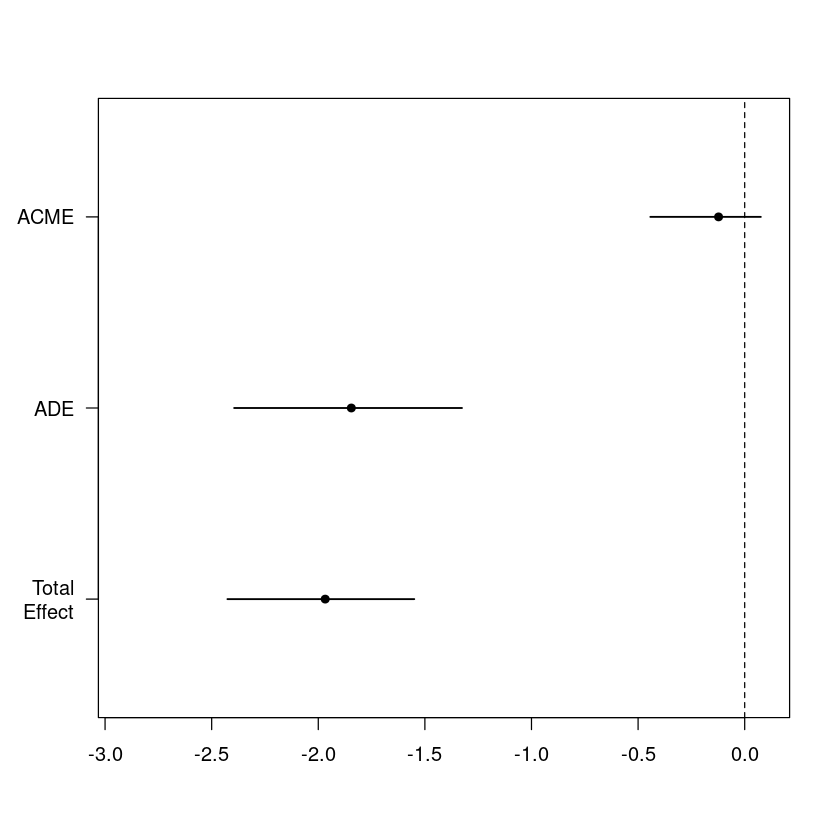

In [135]:
model_a <- lm(brand_exposure_difference ~ review, data = data) 
model_b <- lm(intent ~ review + brand_exposure_difference, data = data)

set.seed(5)
mediation <- mediate(
    model_a, model_b,
    sims = 1000, # Run 1000 simulations
    boot = T, # Calculate bootstrap standard errors for the indirect effect
    treat = "review", # "review" as the treatmeant variable
    mediator = "brand_exposure_difference" # as the mediator variable
    )

summary(mediation)
plot(mediation)

- ADE < 2e-16 suggests that there is a significant direct effect between Fake online review and 
Purchase intention without the mediation of Brand exposure difference.   
- With p-value also < 2e-16, the total effect (direct + indirect effect) is statistically significant.  

### B. Intent ~ Review + Product Attitude

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -0.1782      -0.3677        -0.04   0.012 *  
ADE             -1.7893      -2.2462        -1.35  <2e-16 ***
Total Effect    -1.9675      -2.4260        -1.55  <2e-16 ***
Prop. Mediated   0.0905       0.0192         0.19   0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 99 


Simulations: 1000 


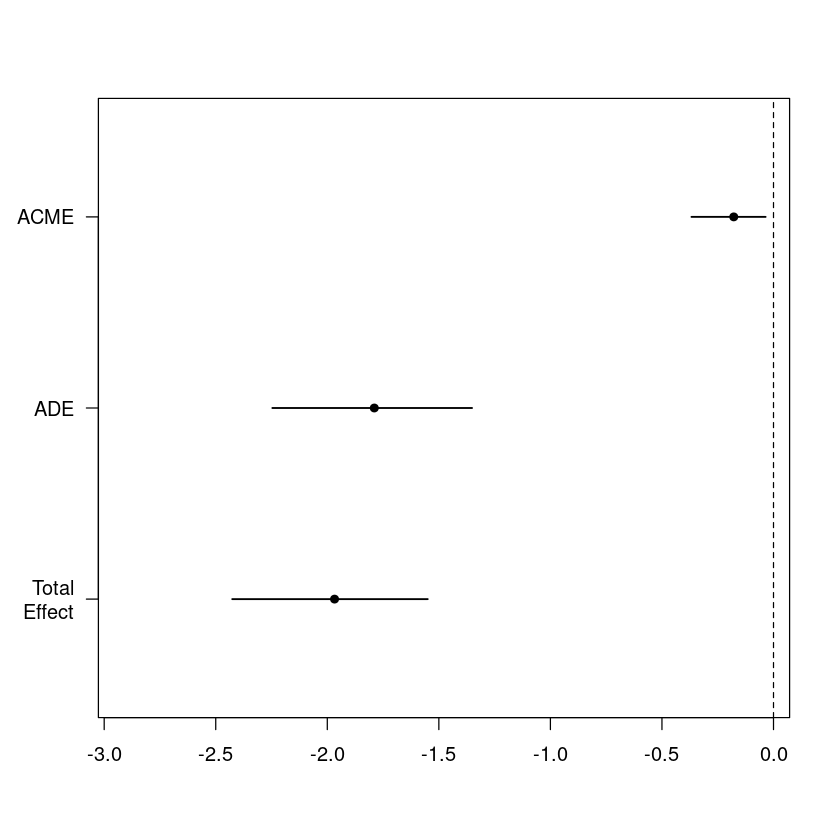

In [136]:
model_a <- lm(product_attitude ~ review, data = data)
model_b <- lm(intent ~ review + product_attitude, data = data)

set.seed(5)
mediation <- mediate(
    model_a, model_b,
    sims = 1000,
    boot = T,
    treat = "review",
    mediator = "product_attitude"
	)

summary(mediation)
plot(mediation)

- ACME (estimate ~ -0.1782 and p = 0.012) suggests that Product attitude is a negative mediator on the relationship of Fake online review and Purchase intention. The effect is statistically significant.   
   
- ADE (estimate ~ -1.789 and p <2e-16) suggests that there is a negatively significant direct effect between Review and Purchase intention (without mediation).   
   
- The total effect is highly significant (estimate ~ -1.968 and p < 2e-16)   
   
- The proportion of the effect mediated by Product attitude is also significant (p = 0.012)   
   
- **The result shows that Product attitude has a mediation impact on Review and Purchase intention**.
**However, ADE also suggests that Review is still having a strong significant impact on Purchase intention even without Product attitude.**

### C. Intent ~ Review + Perceived Quality

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             -1.543       -1.986        -1.20  <2e-16 ***
ADE              -0.424       -0.905         0.08   0.086 .  
Total Effect     -1.967       -2.426        -1.55  <2e-16 ***
Prop. Mediated    0.784        0.601         1.05  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 99 


Simulations: 1000 


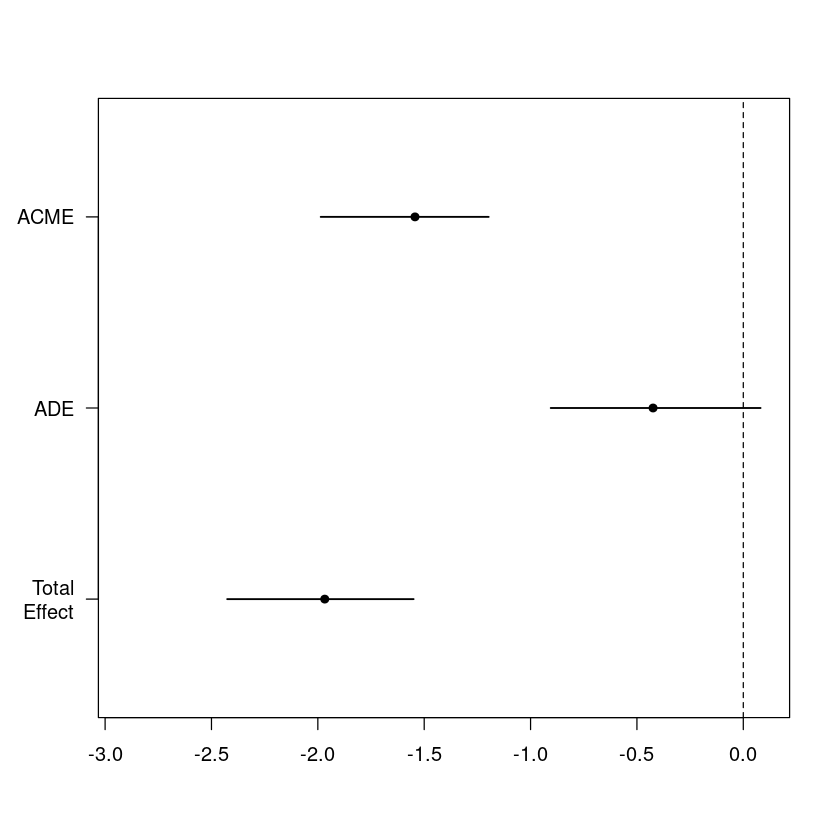

In [137]:
model_a <- lm(product_quality ~ review, data = data)
model_b <- lm(intent ~ review + product_quality, data = data)

set.seed(5)
mediation <- mediate(
    model_a, model_b,
    sims = 1000,
    boot = T,
    treat = "review",
    mediator = "product_quality"
	)

summary(mediation)
plot(mediation)

- ACME (estimate ~ -1.543 and p <2e-16) suggests that Product quality is a negative mediator on the 
relationship of Fake online review and Purchase intention. The effect is statistically significant.   
   
- ADE (estimate ~ -0.424 and p = 0.086) suggests that there is a negatively insignificant direct effect between Review 
and Purchase intention (without mediation).   
   
- The total effect is significant (estimate ~ -1.967 and p < 2e-16)   
   
- The proportion of the effect mediated by Product quality is also significant (p < 2e-16)   
   
- **The result shows that Product quality has an extremely strong mediation impact on Review and Purchase intention**.
**ADE also suggests that Review is having less significant impact on Purchase intention without Quality perception.** 

### D. Intent ~ Review + Consumer Trust

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             -1.618       -2.203        -1.12  <2e-16 ***
ADE              -0.349       -1.031         0.40    0.31    
Total Effect     -1.967       -2.426        -1.55  <2e-16 ***
Prop. Mediated    0.822        0.544         1.22  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 99 


Simulations: 1000 


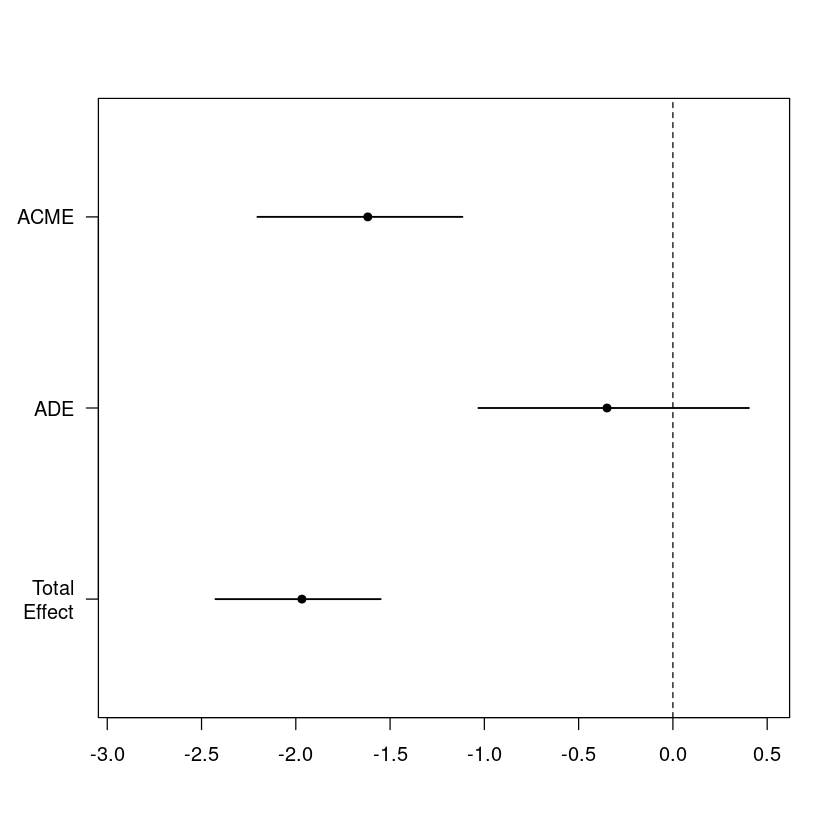

In [138]:
model_a <- lm(trust ~ review, data = data)
model_b <- lm(intent ~ review + trust, data = data)

set.seed(5)
mediation <- mediate(
    model_a, model_b,
    sims = 1000,
    boot = T,
    treat = "review",
    mediator = "trust")

summary(mediation)
plot(mediation)

- ACME (estimate ~ -1.618 and p <2e-16) suggests that Trust is a negative mediator on the relationship of Fake online review and Purchase intention. The effect is statistically significant.   
   
- ADE (estimate ~ -0.349 and p = 0.310) suggests that there is a negatively insignificant direct effect between Review and Purchase intention (without mediation).   
   
- The total effect is significant (estimate ~ -1.967 and p < 2e-16).   
   
- The proportion of the effect mediated by Trust is also significant (p < 2e-16).   
   
- **The result shows that Trust has an extremely strong mediation impact on Review and Purchase intention**.
**ADE also suggests that Review is having less significant impact on Purchase intention without Trust.** 

### E. Intent ~ Review + Market Commitment

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             -0.931       -1.332        -0.59  <2e-16 ***
ADE              -1.036       -1.570        -0.52  <2e-16 ***
Total Effect     -1.967       -2.426        -1.55  <2e-16 ***
Prop. Mediated    0.473        0.296         0.70  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 99 


Simulations: 1000 


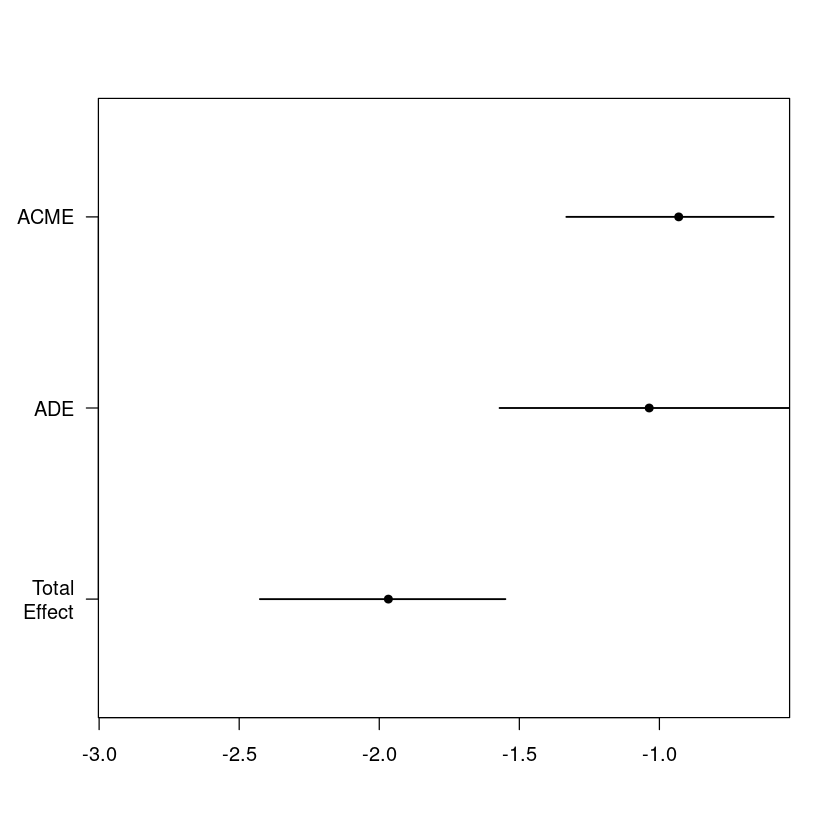

In [139]:
model_a <- lm(market_commit ~ review, data = data)
model_b <- lm(intent ~ review + market_commit, data = data)

set.seed(5)
mediation <- mediate(
    model_a, model_b,
    sims = 1000,
    boot = T,
    treat = "review",
    mediator = "market_commit")

summary(mediation)
plot(mediation)

- ACME (estimate ~ -0.931 and p <2e-16) suggests that Market Commitment is a negative mediator on the relationship of Fake online review and Purchase intention. The effect is statistically significant.   
   
- ADE (estimate ~ -1.036 and p <2e-16) suggests that there is a negatively significant direct effect between Review and Purchase intention (without mediation).   
   
- The total effect is significant (estimate ~ -1.967 and p < 2e-16)   
   
- The proportion of the effect mediated by Market Commitmente is also significant (p < 2e-16)   
   
- **The result shows that Market Commitment has a strong mediation impact on Review and Purchase intention**.
**However, ADE also suggests that Review is still having a significant impact on Purchase intention even without Market Commitment.**

<a id="3.8"></a>
## 3.8. Moderation Analysis

In this section, we will examine if **Demographic variables** moderate the effects of *fake online reviews on the dependent variables*.

Note that there are 4 demographic variables: *age*,*gender*,*profession*,*language*. 

Moderation analysis will be conducted by creating a linear regression model using fucntion **lm()**. Inside the function:
- `~` represents the relationship between the dependent variable and review (predictor).
- `+` represents the additional predictor added to the models, in this case are the demographic variables.
- `*` represents the interaction relationship between predictors.

### A. Brand Exposure Difference ~ Review + Demographics

In [140]:
data %>%
lm(
    brand_exposure_difference ~ review + age + gender + profession + lang + 
    review*age + review*gender + review*profession + review*lang,
    data =.) %>%
summary()


Call:
lm(formula = brand_exposure_difference ~ review + age + gender + 
    profession + lang + review * age + review * gender + review * 
    profession + review * lang, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.71550 -0.40233  0.04729  0.56333  2.84849 

Coefficients: (2 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)         -0.23222    0.49648  -0.468   0.6412  
review0              0.07486    0.70205   0.107   0.9154  
age                 -0.02527    0.01449  -1.744   0.0850 .
gender2              0.04962    0.27287   0.182   0.8561  
gender3             -0.61425    1.00367  -0.612   0.5422  
profession2          0.79879    0.47019   1.699   0.0932 .
profession3          0.54671    0.73901   0.740   0.4616  
profession4          1.20338    0.64453   1.867   0.0655 .
profession5          1.01229    0.71200   1.422   0.1589  
profession6          1.69781    1.09554   1.550   0.1251  
langDE   

The result shows that language with p = 0.0437 < 0.05, which means there is a significant moderation effect. 
The effect of fake online reviews on brand exposure difference **significantly depends on language**

### B. Product Attitude ~ Review + Demographics

In [141]:
data %>%
	lm(
		product_attitude ~ review + age + gender + profession + lang + 
    	review*age + review*gender + review*profession + review*lang,
    	data =.
		)%>%
    summary()


Call:
lm(formula = product_attitude ~ review + age + gender + profession + 
    lang + review * age + review * gender + review * profession + 
    review * lang, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2782 -0.3774  0.0238  0.4201  2.5434 

Coefficients: (2 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.182380   0.481537   8.685 3.33e-13 ***
review0              0.017318   0.680918   0.025   0.9798    
age                  0.022301   0.014055   1.587   0.1165    
gender2              0.288342   0.264651   1.090   0.2792    
gender3             -0.535514   0.973452  -0.550   0.5838    
profession2         -0.907725   0.456033  -1.990   0.0499 *  
profession3         -1.251175   0.716761  -1.746   0.0847 .  
profession4         -0.871882   0.625123  -1.395   0.1669    
profession5         -1.138134   0.690563  -1.648   0.1032    
profession6          1.524191   1.062559   1.434   0.1553

The results show a little significant effect of White collar worker (p = 0.499) on the effect of fake online reviews on product attitude. Estimate ~ -.907725 means that these participants are likely to have a more negative attitude towards the product.   
   
With profession = 2, it's considered to be the moderator with significant effect on the effect of fake online reviews on product attitude.   
   
It's notable that with with coefficient of 1.52, it shows that the unemployed (profession6) are tend to have a good attitude towards the product. However with a p = 0.1553, the significance is weak.

### C. Perceived Quality ~ Review + Demographics

In [142]:
data %>%
    lm(
		product_quality ~ review + age + gender + profession + lang + 
    	review*age + review*gender + review*profession + review*lang,
    	data =.
		) %>%
    summary()


Call:
lm(formula = product_quality ~ review + age + gender + profession + 
    lang + review * age + review * gender + review * profession + 
    review * lang, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21941 -0.45878 -0.00253  0.34499  2.06647 

Coefficients: (2 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.60356    0.46345   9.933 1.15e-15 ***
review0              0.25065    0.65534   0.382   0.7031    
age                 -0.02107    0.01353  -1.557   0.1233    
gender2              0.01462    0.25471   0.057   0.9544    
gender3             -1.05580    0.93688  -1.127   0.2631    
profession2         -0.51125    0.43890  -1.165   0.2475    
profession3         -1.05556    0.68983  -1.530   0.1299    
profession4         -0.59551    0.60164  -0.990   0.3252    
profession5         -0.50155    0.66462  -0.755   0.4527    
profession6         -0.38157    1.02264  -0.373   0.7100  

No significant effect

### D. Consumer Trust ~ Review + Demographics

In [143]:
data %>%
    lm(
		trust ~ review + age + gender + profession + lang + 
    	review*age + review*gender + review*profession + review*lang,
    	data =.
		) %>%
    summary()


Call:
lm(formula = trust ~ review + age + gender + profession + lang + 
    review * age + review * gender + review * profession + review * 
    lang, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6729 -0.4258  0.0000  0.4060  1.7483 

Coefficients: (2 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.86106    0.44548   8.667 3.62e-13 ***
review0              0.54044    0.62993   0.858  0.39346    
age                 -0.02622    0.01300  -2.016  0.04708 *  
gender2             -0.11404    0.24483  -0.466  0.64262    
gender3             -1.58462    0.90056  -1.760  0.08225 .  
profession2         -0.13426    0.42189  -0.318  0.75112    
profession3          0.08067    0.66309   0.122  0.90348    
profession4          0.12776    0.57831   0.221  0.82572    
profession5          0.02784    0.63885   0.044  0.96534    
profession6          2.85959    0.98300   2.909  0.00468 ** 
langDE           

The results show 2 significant moderation of:
- Profession 6 (Unemployed) - p = 0.00468 < 0.05
- Age - p = 0.047 
on the effect of fake online reviews on consumer trust.   
   
For Age, with a estimate coefficient of -.02622, shows that with one unit (1 year) of Age increased, there is a decrease of 0.02622 in trust.   
   
For unemployed participants, their consuming trust are likely to be higher than others.

### E. Purchase Intention ~ Review + Demographics

In [144]:
data %>%
    lm(
		intent ~ review + age + gender + profession + lang + 
    	review*age + review*gender + review*profession + review*lang,
    	data =.
		)%>%
    summary()


Call:
lm(formula = intent ~ review + age + gender + profession + lang + 
    review * age + review * gender + review * profession + review * 
    lang, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82858 -0.52458  0.01129  0.49641  2.25074 

Coefficients: (2 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.136820   0.570546   7.251  2.2e-10 ***
review0             -1.154536   0.806780  -1.431   0.1563    
age                 -0.012753   0.016653  -0.766   0.4460    
gender2             -0.014911   0.313569  -0.048   0.9622    
gender3             -0.474094   1.153386  -0.411   0.6821    
profession2         -0.686122   0.540326  -1.270   0.2078    
profession3         -0.873195   0.849248  -1.028   0.3069    
profession4         -0.367997   0.740671  -0.497   0.6206    
profession5         -0.659253   0.818207  -0.806   0.4228    
profession6          0.936213   1.258964   0.744   0.4592

The coefficient review:age is significant, The interaction between age (moderator) and review hasa positive effect on Purchase Intent.   
   
The moderation is 0.05, means that with one unit (1 year) of Age increased, there is a 0.05 increased in the effect of fake reviews on purchase intent and Purchase Intent is expected to increase by 0.05 units.

### F. Market Commitment ~ Review + Demographics

In [145]:
data %>%
	lm(
		market_commit ~ review + age + gender + profession + lang + 
    	review*age + review*gender + review*profession + review*lang,
    	data =.
		)%>%
    summary()


Call:
lm(formula = market_commit ~ review + age + gender + profession + 
    lang + review * age + review * gender + review * profession + 
    review * lang, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.74017 -0.66338  0.01116  0.67655  2.73202 

Coefficients: (2 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.83143    0.64754   7.461 8.57e-11 ***
review0             -1.02769    0.91566  -1.122   0.2650    
age                 -0.02778    0.01890  -1.470   0.1455    
gender2             -0.11789    0.35589  -0.331   0.7413    
gender3             -1.02842    1.30904  -0.786   0.4344    
profession2          0.15892    0.61324   0.259   0.7962    
profession3         -0.26292    0.96386  -0.273   0.7857    
profession4         -0.09348    0.84063  -0.111   0.9117    
profession5         -0.25903    0.92863  -0.279   0.7810    
profession6          3.77991    1.42886   2.645   0.0098 ** 

The results show that profession6 is having a estimated coefficient of 3.7799.   
   
This means that Unemployed participants (Profession 6) tend to commit to the e-market compared to other professions. With p-value of 0.0098, the coefficient is significantly secure the strong relationship between profession6 and the effect of fake online reviews to Market Commitment.

<a id="3.9"></a>
## 3.9. Path Analysis

### Path Analysis model
Explore: Relationships: Independent Variable - Dependent Variables, Mediating & Moderating variables simultaneuosly.   

- Gender and profession are categorical variables that both have more than 2 levels. However, lavaan treats exogenous variables as predictors (independent variables), which is wrong. Thus, we need to first create dummy variables and then use them in the path analysis model.   
- The path analysis model will then be created by the direct & indirect paths of variables.   

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
product_attitude,~,review,0,0.4118380893,0.182737730,2.25371132,2.421433e-02
trust,~,review,0,2.4619834738,0.191050197,12.88657911,0.000000e+00
intent,~,review,0,1.7965154119,0.218354935,8.22750084,2.220446e-16
brand_exposure_difference,~,review,0,0.9066493352,0.192870693,4.70081441,2.591259e-06
product_quality,~,review,0,1.9537901179,0.178996726,10.91522824,0.000000e+00
market_commit,~,review,0,1.6194875198,0.259052379,6.25158328,4.063123e-10
product_attitude,~,brand_familiarity_mean,0,0.1102854518,0.083067653,1.32765822,1.842910e-01
product_attitude,~,internet_mean,0,-0.1573616257,0.087352156,-1.80146242,7.163003e-02
product_attitude,~,product_interest_mean,0,0.3029955072,0.235172548,1.28839658,1.976079e-01


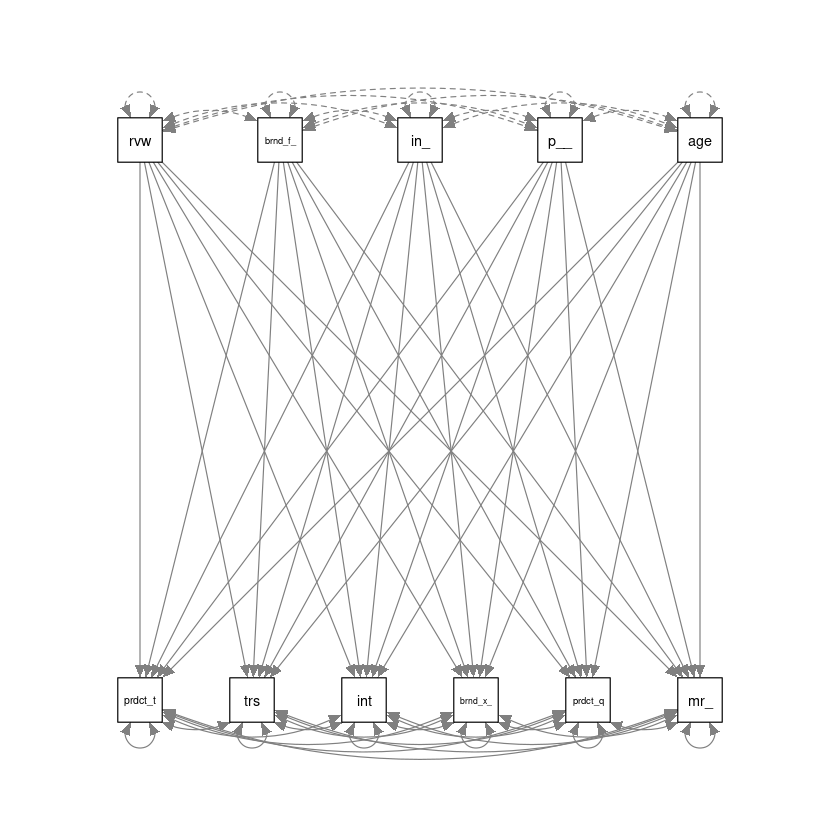

In [146]:
# Define the path analysis model
path_analysis <-  '
    # Direct effects
    product_attitude ~ review
    trust ~ review
    intent ~ review
    brand_exposure_difference ~ review
    product_quality ~ review
    market_commit ~ review


    # Covariates & Demographics effects
    product_attitude ~ 
    brand_familiarity_mean + internet_mean + product_interest_mean + age
  
    trust ~ 
    brand_familiarity_mean + internet_mean + product_interest_mean + age
  
    intent ~ 
    brand_familiarity_mean + internet_mean + product_interest_mean + age
  
    brand_exposure_difference ~ 
    brand_familiarity_mean + internet_mean + product_interest_mean + age
  
    product_quality ~ 
    brand_familiarity_mean + internet_mean + product_interest_mean + age
  
    market_commit ~ 
    brand_familiarity_mean + internet_mean + product_interest_mean + age


    # Residual correlations
    product_attitude ~~ 
    trust + intent + brand_exposure_difference + product_quality + market_commit
  
    trust ~~ 
    intent + brand_exposure_difference + product_quality + market_commit
  
    intent ~~ 
    brand_exposure_difference + product_quality + market_commit

    brand_exposure_difference ~~ 
    product_quality + market_commit   
       
    product_quality ~~ 
    market_commit
'

# Fit the model
set.seed(5)
fit <- sem(path_analysis, data = data)

# Summarize the model
summary(fit)

semPaths(fit)

### Intepretation

#### Regression: Review ~ Dependent variables  
- Review has positive estimates on dependent variables, shows positive relationships with the dependent variables: Product 	 	 attitude (0.412), Brand exposure difference (0.907), Trust(2.462), Purchase Intention(1.797), Quality(1.954) and Market 	 	 Commitmen(1.619).   
- Review has a significant effect on most of the dependent variables (p <0.05).   

#### Regression: Covariates ~ Dependent variables   
- The analysis shows that there are some positive/negative effects between the covariates and the dependent variables, but 		most of them are not significant.   
- The significance can be observed in the relationship between:    
    		+  Intent ~ Product Interest (e ~ 0.852, p = 0.002)   
        	+  Product Quality ~ Age (e ~ -0.013, p = 0.040)   
        	+  Market Commitment ~ Internet Usage (e ~ 0.318, p = 0.011)   
        	+  It's notable that those relationships have high positive estimates and with low p.   
- Therefore, we can say that Internet Usage is significantly positively affect Market Commitment while Product Interest 		significantly affect Purchase Intention score.   
- Brand exposure difference is not likely to be impacted by Brand familiarity, Internet usage and Product interest.   
   

#### Covariances   
- We can see most of the covariance relationships are significantly positive (p < 0.05), for example (the rest are not 		  	  mentioned):   
    - Product Attitude ~~ Trust(e ~ 0.217) + Purchase Intention(e ~ 0.271) + Product Quality (e ~ 0.190) + Market 					Commitment(e ~ 0.388).   
    - This shows that all of the variables there tends to increase when customer's attitude on products is higher and 
    their relationships are all significant. The relationship between Brand exposure difference & Product Attitude is   			insignificant (large p).   
    - Trust ~~ Purchase Intention (e ~ 0.461) + Product Quality (e ~ .413) + Market Commitment (e ~ 0.566). This proves that 		with Trust increase, Purchase Intention, Marketing Commitment will also increase along with Product Quality perception.  
            

- On the other hand, the covariance relationship between Brand Exposure Difference and other variables are not significant, for example:   
     - Trust ~~ Brand Exposure Difference (p = 0.199)   
     - Intent ~~ Brand Exposure Difference (p = 0.135)   
     - Brand Exposure Difference ~~ Quality (p = 0.121) ...   
     - However, they still have a positive relationship, means that one increase, the other may also increase and vice versa.   
   
   
#### Figure 9 test
- Figure 9 is the theoretical framework of the research, it points out the overview of the relationship between independent (fake review) and dependent variables (Brand attitude, consumer trust, Purchase Intent) under investigation.   

- We will take a look at all of the 4 relationships that we need to find the answer:   
   
    **H1: Review -> Brand Exposure Difference** ((brand_post_exposure - brand_pre_exposure) ~ review)   
        -   Regression: Review has a positive effect on Brand Exposure Difference.   
        Review has a significant impact on Brand Exposure Difference (p < 0.05).   
        -   This shows how participants' attitude change when they perceipt Fake or Real review. 
        There is a significant relationship between Review and Brand exposure difference. 
        Brand exposure difference tends to be higher when there is Fake reviews compared to Real reviews. 
   
    **H2: Review -> Consumer Trust:**   
        -   Review has a significantly (p < 0.05) positive (estimate ~ 2.462) effect on Consumer Trust.   
        -   There is a significant relationship between Review and Brand exposure difference.   
        -   This proves that the increase of Fake Review is associated with the decrease in Consumer Trust or 
        Trust is likely to be higher when there are Real reviews.   
   
    **H3: Review -> Purchase Intent:**   
        -   Review has a significantly (p < 0.05) positive (estimate ~ 1.797) effect on Purchase Intention.   
        -   There is a significant relationship between Review and Brand exposure difference.   
        -   This proves that the increase of Fake Review is associated with the decrease in Purchase Intention or 
        Intention is likely to be higher when there are Real reviews.      
   
    **H4: Consumer Trust -> Purchase Intention:**   
        -   Trust ~~ Intent has an estimate ~ 0.461 and p < 0.05.   
        -   Due to ~~ represents a double-sided relationship. We can say that Trust affect Intent and this is a significant relationship.   
        -   Which means that when Consumer Trust increases, Purchase Intention tends to increase.   


<a id="3.10"></a>
## 3.10. Cluster Analysis

First step is to standardize the dataset. Different variable comes with different values with different ranges. 
It's important to make sure all the variables have the same scale so they can be compared correctly to avoid misleading results.
- Choose only variables that are needed for the analysis
- Perform scaling by using scale() function

### Standardization

In [147]:
data_cluster <- data[, c("age","brand_exposure_difference","product_attitude","product_quality",
						 "trust","intent","market_commit","product_interest_mean","internet_mean","brand_familiarity_mean")]

data_cluster[, c("age","brand_exposure_difference","product_attitude","product_quality",
				 "trust","intent","market_commit","product_interest_mean","internet_mean","brand_familiarity_mean")] =

scale(data_cluster[,c("age","brand_exposure_difference","product_attitude","product_quality",
					  "trust","intent","market_commit","product_interest_mean","internet_mean","brand_familiarity_mean")])

### Number of clusters

In cluster analysis, it is important to determine the correct number of clusters correct, not enough clusters may skip many important information of the data or oversimplified the variations of the dataset, while too many clusters may make it overfitting, lack of interpretability.

In this case study, we will use the Elbow method, by plot the total witihin sum of squares (wss) against the number of clusters. The correct number of the cluster may be in the point where the decreasing rate in wss significantly drops.

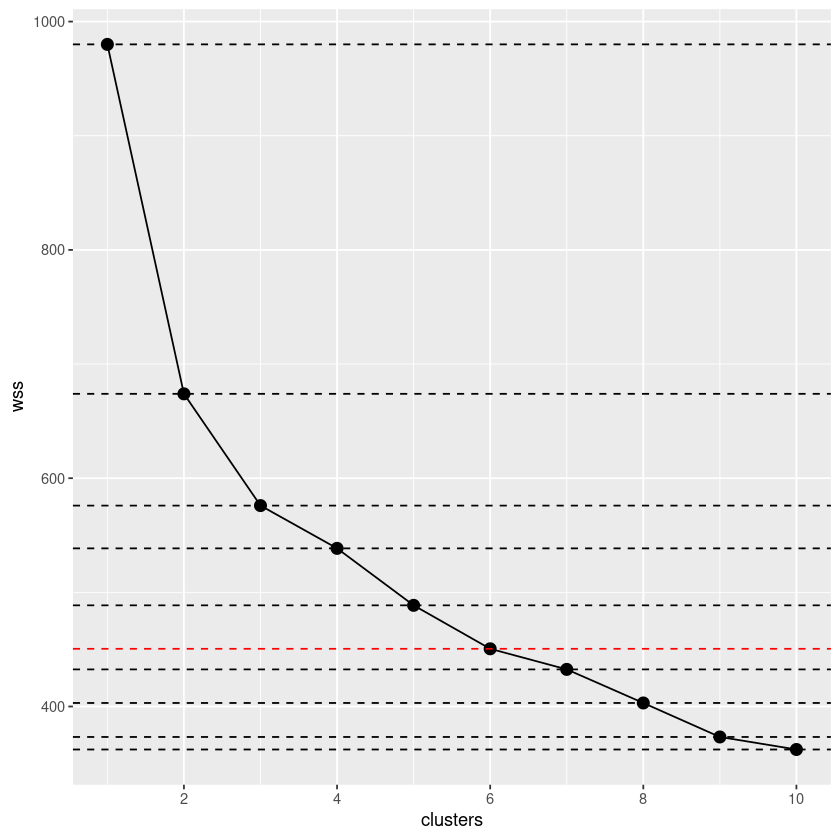

In [148]:
# We will try 10 clusters
n_clusters <- 10

# Total within sum of squares error: wss
wss <- numeric(n_clusters)
set.seed(5)

# Look over 1 to n possible clusters
for (i in 1:n_clusters) {
    
k_means_segmentation <- kmeans(data_cluster, i)

wss[i] <- k_means_segmentation$tot.withinss }

# Generate a scree plot
wss_df <- tibble(clusters = 1:n_clusters, wss = wss)
    
wss_df %>%
    ggplot(
        aes(
            x = clusters,
            y = wss,
            group = 1
            )
    	)+
    geom_point(
        size = 3
    	)+
    geom_line()+
    scale_x_continuous(
        breaks = c(2, 4, 6, 8, 10)
        )+
    geom_hline(
        yintercept = wss,
        linetype = 'dashed',
        col = c(rep('#000000',5),'#FF0000', rep('#000000', 4))
        )

-   By observing the scree plot, we can notice that the total the total within-cluster sum of squares decreases as the number of cluster increases.   
   
-   At 6 clusters, the total within-cluster sum of squares decrease at a much lower rate (criterion of choosing the number of clusters).

-   We will conduct one more test to check if 6 clusters is the right answer.

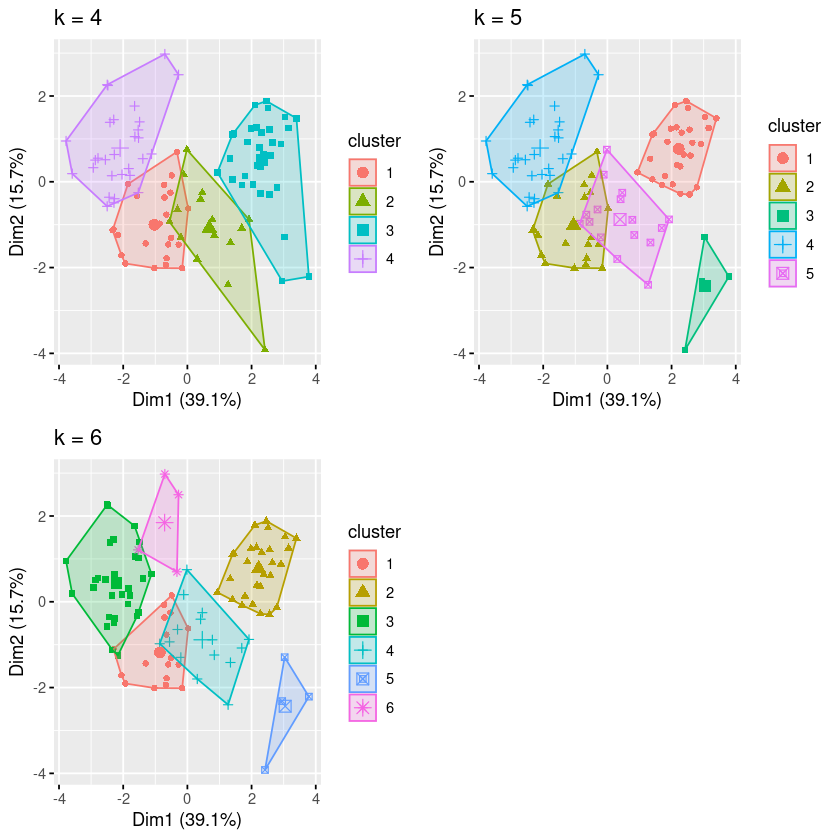

In [149]:
set.seed(5)
k4 <- kmeans(data_cluster, centers = 4, nstart = 25) # with 4 clusters
k5 <- kmeans(data_cluster, centers = 5, nstart = 25) # with 5 clusters    
k6 <- kmeans(data_cluster, centers = 6, nstart = 25) # with 6 clusters

# plots to compare
p4 <- fviz_cluster(k4, geom = "point",  data = data_cluster) + ggtitle("k = 4")
p5 <- fviz_cluster(k5, geom = "point",  data = data_cluster) + ggtitle("k = 5")
p6 <- fviz_cluster(k6, geom = "point",  data = data_cluster) + ggtitle("k = 6")

grid.arrange(p4, p5, p6, nrow = 2)

-   At 6 clusters, we can see that there are many overlappings happen (1-4,1-3-6), which can possibly cause overfitting. Similar issue can be observed in k = 5.   

-   However at 4 clusters we can see the data are divided into cleaner groups, there was no overlapping, which could make it more complex and difficult to analyze and differentiate cluster groups.   
   
-   Therefore, 4 clusters will be used for the analysis.  

### Visualization and interpretation.

We will first add the cluster variable to the original dataset and take a look at our 4 cluster groups:

# A tibble: 4 × 11
  cluster   age brand_exposure_difference product_attitude product_quality trust
    <int> <dbl>                     <dbl>            <dbl>           <dbl> <dbl>
1       1  31.5                    -0.380             5.01            5.06  4.37
2       2  27.6                    -0.45              4.27            4.11  3.99
3       3  50.4                    -0.828             4.30            2.72  2.14
4       4  52.9                     0.560             5.28            5.32  5.45
# ℹ 5 more variables: intent <dbl>, market_commit <dbl>,
#   product_interest_mean <dbl>, internet_mean <dbl>,
#   brand_familiarity_mean <dbl>


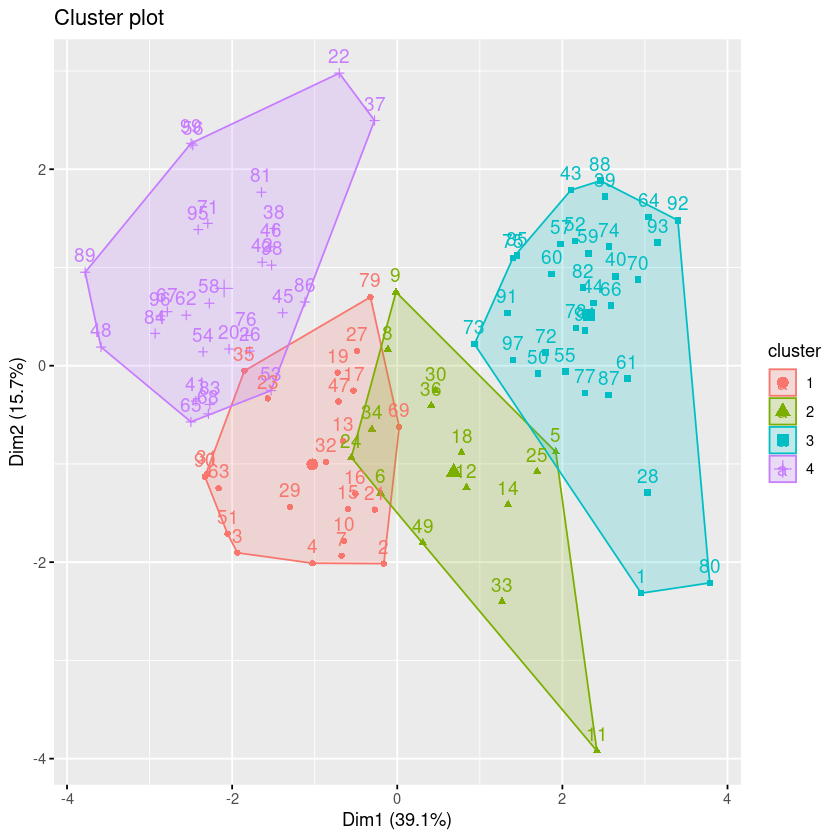

In [150]:
cluster_result <- cbind(cluster = k4$cluster, data)

cluster_table <- cluster_result %>%
    group_by(cluster) %>%
    summarize(
        age = mean(age),
        brand_exposure_difference = mean(brand_exposure_difference),
        product_attitude = mean(product_attitude),
        product_quality = mean(product_quality),
        trust = mean(trust),
        intent = mean(intent),
        market_commit = mean(market_commit),
        product_interest_mean = mean(product_interest_mean),
        internet_mean = mean(internet_mean),
        brand_familiarity_mean = mean(brand_familiarity_mean)
    )

print(cluster_table)

fviz_cluster(k4, data = data_cluster)

**4 cluser groups comparison**

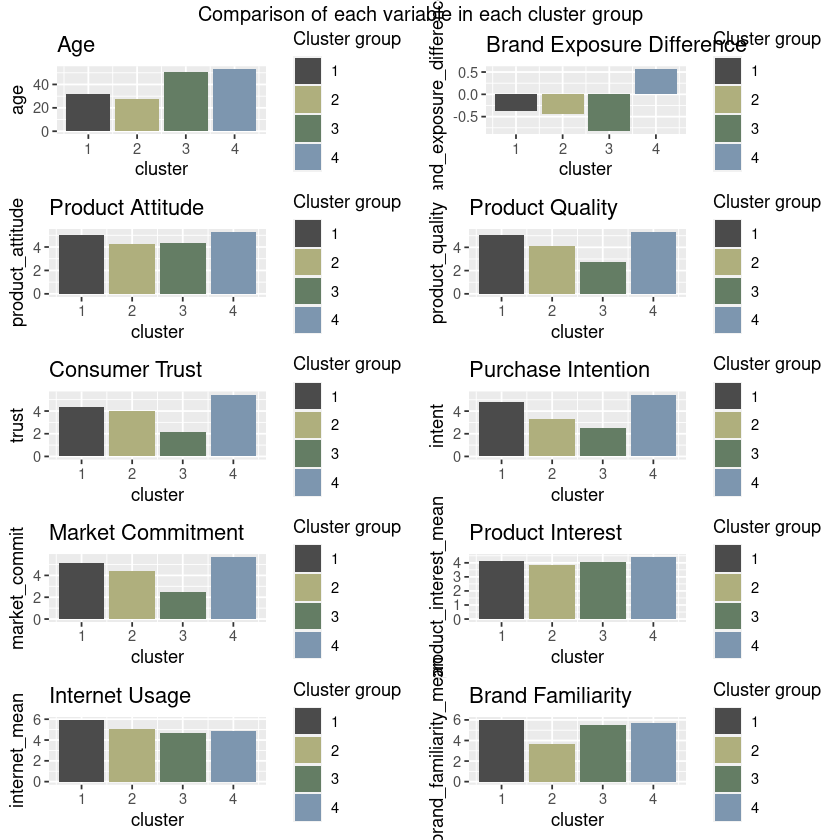

In [157]:
    c1 <- cluster_table %>%
        ggplot(
            aes(
                cluster, age, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Age",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c2 <- cluster_table %>%
        ggplot(
            aes(
                cluster, brand_exposure_difference, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Brand Exposure Difference",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c3 <- cluster_table %>%
        ggplot(
            aes(
                cluster, product_attitude, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Product Attitude",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c4 <- cluster_table %>%
        ggplot(
            aes(
                cluster, product_quality, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Product Quality",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c5 <- cluster_table %>%
        ggplot(
            aes(
                cluster, trust, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Consumer Trust",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c6 <- cluster_table %>%
        ggplot(
            aes(
                cluster, intent, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Purchase Intention",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c7 <- cluster_table %>%
        ggplot(
            aes(
                cluster, market_commit, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Market Commitment",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c8 <- cluster_table %>%
        ggplot(
            aes(
                cluster, product_interest_mean, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Product Interest",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c9 <- cluster_table %>%
        ggplot(
            aes(
                cluster, internet_mean, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Internet Usage",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)

    c10 <- cluster_table %>%
        ggplot(
            aes(
                cluster, brand_familiarity_mean, 
                fill = as.factor(cluster)
                )
            )+
        geom_bar(
            stat = "identity"
            )+
        scale_x_continuous(
            breaks = seq(1,6, by = 1)
            )+
        labs(
            title = "Brand Familiarity",
            fill ="Cluster group"
        )+
		scale_fill_nord(
			'algoma_forest'
		)
grid.arrange(
    c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,
    ncol = 2,
    top = "Comparison of each variable in each cluster group")

**Interpretation:**   
From 4 cluster groups, we can clearly see that they are divided into 2 smaller groups of old adults (1-2) and young adults (3-4).   
   
-   Comparison between G1 and G2 (Young adults):   
    -   G1: High Product attitude, Quality perception. Possess average-high Trust, Purchase intention and Market commitment. These participants have a very high internet usage and brand familiarity. These are young consumers who usually use Internet and often engage in E-commerce market. They can be describe as people who have a positive attitude towards product and brand, more likely to purchase the product.   
       
    -   G2: Moderate Product attitude, Quality perception and trust. However they have lower purchase intention and market commitment compared to G1. They also have a high Product interest and Internet usage, however possesses a lower Brand familiarity. These are customers who tend to consider more when making a purchase. They have lower attitude toward the market and less commitment to product & market.   
   
   
-   Comparison between G3 and G4 (Old adults):   
    -   G3: Lower Attitude, Quality perception as well as Trust, Intention and Market Commitment. However they have a high Interest as well as a high brand familiarity. We can describe this group as the opposite of G1 who are familiar to brands but stricter and consider carefully when making a purchase. They tends to have a negative attitude towards the market and less likely to commit with a certain market. However, they show a high grade in Product Interest, which means they are willing to purchase if the product suits their requirements.   
       
    -   G4: High Attitude, Quality perception, Trust and Interest towards the product. They also have very high Purchase intention, Market commitment & Brand familiarity. We can describe this group as easy-going customers who are often shopping, willing to spend their money more and have lower requirements towards their purchase.   
         
-   Brand exposure difference: For G1, G2, G3, Brand attitude tends to decrease post exposure, with G3 decreases the most. For G4, Brand attitude tends to increase after exposure.   


# IV. Conclusion
## Conclusion
- Dependent variables: *Brand exposure difference*, *Product attitude*, *Perceived quality*, *Consumer trust*, *Purchase intention* and *Market commitment*
- Covariates: *Brand familiarity*, *Internet usage*, *Product interest*

**Based on the ANOVA test/ effect size calculation/ Tukey post-hoc test**, we can see significant relationships between review and all of the dependent variables. This suggests that there is a significant difference in the value of the dependent variables between fake & real reviews. Fake reviews, on average, lead to lower value of dependent variables while Real reviews usually result in higher degree.

**Through the Regression analysis** by determining the relationship between the dependent variables and the covariates, we can see how strong their connections are. *Product interest* undeniably possesses significant impact on most of the dependent variables. Moreover, *Brand familiarity* and customer's *Internet usage* don't have such strong impact on the dependent variables in general, but *Internet usage* heavily affects *Perceived quality*,*Customer trust* and *Market commitment*.

**In the mediation analysis**, by using dependent variables as mediators for the relationship between *Purchase intention* and reviews, we can see that:
- For most of the mediators, when included, has strong mediation impact on *Review* and *Purchase intention*.
- Review has a less significant impact to *Purchase intention* when there is no *Trust*, *Perceived quality*
- Review has the same impact even when they are not mediated by *Brand exposure difference*, *Product attitude*, *Market commitment*

By examining how demographic variables **moderate the effect** of Fake online reviews on the dependend variables, we can observe many interesting insights:
- Unemployed participants, under the impact of Fake reviews, tend to have high *Product atttiude* and *Trust* compared to ones who have a job (usually have negative attitude towards the product).
- Unemployed participants, under the impact of Fake reviews, commit more to a certain type of e-market.
- Older participants, under the impact of Fake reviews, are likely to distrust the product. Moderation analysis shows that with **1 year of age increases, there is a decrease of 0.026 in *Trust***.
- Older partipants, under the impact of Fake reviews, are more likely to purchase. With 1 year of age increases, *Purchase intention* raises by 0.05.

**From path analysis**:
- *Brand exposure difference* tends to be higher when there is Fake reviews compared to Real reviews.
- *Trust* is likely to be higher when there are *Real reviews*.
- *Purchase Intention* is likely to be higher when there are *Real reviews*.
- *Consumer Trust increases, Purchase Intention tends to increase*.

**The result of Cluster analysis** shows that we can divide the participants into 04 groups of 2 young adults groups (G1/G2) and 2 old adult groups (G3/G4). In each age range, there will be always 2 types of participants:
- Type 1: Often shopping, easy-going, more likely to make a purchase, usually have a positive view towards the brand & the product.
- Type 2: Shop less, tends to consider carefully when buying a product. They have low brand & product attitude, less commitment, familiarity to a certain brand, product or e-market.

Based on the analysis, we consider the 4 original hypotheses:
- H1: Fake online reviews negatively impact consumers’ attitudes toward the brand (Accept)
- H2: Fake online reviews have a negative effect on consumers’ trust in online platform and reviews (Accept)
- H3: Fake online reviews negatively influence consumers’ purchase intention (Accept)
- H4: Consumer trust in the online reviews increases purchase intention (Accept)

## Suggestions to the limits of the dataset
- Reduce human error (Many human input errors).
- Do survey with a bigger sample size or conduct in a more varied population. The dataset may not reflected the population 100% because of different situational elements, small sample size and due to a fact that Austria may not represent the whole world.
- Take more brands into account (Product/Brand biased (Only Samsung was taken as reference)).
